Imagine a home buyer describing their dream house, they might focus on the number of bedrooms or the beautiful yard. However, as you’ll discover in this project, many factors can influence a home's price beyond just its visible features. With a dataset containing 79 variables that describe nearly every aspect of residential properties in Ames, Iowa, your challenge will be to predict the final sale price of each home.
This project will give you hands-on experience in:
•
Creative Feature Engineering: Identifying and creating new features that could improve your model’s performance.
•
Advanced Regression Techniques:
Implementing and tuning models such as Random Forests and Gradient Boosting to make accurate predictions.

Objective

Your primary task is to develop a predictive model that estimates the sales price of homes in the test dataset. Specifically, for each Id in the test set, you must predict the corresponding SalePrice.

Dataset

The dataset is split into two parts:
1.
Training Set: Contains 79 features along with the SalePrice (target variable) for each house.
2.
Test Set: Contains the same 79 features, but without the SalePrice. Your task is to predict the SalePrice for these entries.
You can find the dataset files and a data dictionary that describes each feature in detail:
•
train.csv: Training data, including SalePrice.
•
test.csv: Test data for which you need to predict SalePrice.
•
data_description.txt: Detailed descriptions of each feature in the dataset.

Evaluation Metric

Your submissions will be evaluated based on the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted values and the logarithm of the actual sales prices. This metric ensures that errors in predicting both expensive and inexpensive houses have an equal impact on your score.

Instructions

1.
Data Exploration and Cleaning:

•
Begin by thoroughly exploring the data. Identify and handle missing values, outliers, and any potential inconsistencies.
•
Utilize the data_description.txt file to understand each feature and its relevance to the task.

2.
Feature Engineering:

•
Consider creating new features from the existing ones. For example, you could engineer features like the age of the house, interaction terms, or categorize continuous variables where it makes sense.
•
Think creatively about how you can transform the data to improve your model's predictive power.

3.
Modeling:

•
Implement at least two different regression models. You should include one baseline model (e.g., Linear Regression) and one advanced model (e.g., Random Forest, Gradient Boosting).
•
Experiment with hyperparameter tuning to optimize your models' performance.

4.
Model Evaluation:

•
Evaluate your models using cross-validation on the training set. Ensure that your approach avoids overfitting and generalizes well to unseen data.
•
Use the RMSE metric as described to compare model performance.

5.
Prediction:

•
Generate predictions on the test set using your best-performing model.
•
Prepare your final submission, including the predicted SalePrice for each Id in the test set.

6.
Dashboard and Web Application Development (Optional)

•
Use a library like Dash or Streamlit to create an interactive dashboard that allows users to input car features and receive price predictions.
•
Incorporate visual elements to display the inputs, predicted prices, and any relevant statistics or graphs.

7.
Report:

•
Submit a comprehensive report detailing your approach. The report should include your data cleaning process, feature engineering strategies, model selection and tuning, and final results.
•
Reflect on what worked well and what could be improved with more time.

8.
Final Presentation

•
On the last day of class, prepare a 15-20-minute presentation on the various steps of the project.

In [76]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.model_selection  import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [77]:

# Upload data of training set                               
df_train = pd.read_csv('train.csv')
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [78]:
#checking information about data
df_train.info()
df_train.describe()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [79]:
#checking 'percentage of missing values, if any persentage of missing values is more than 50% then we will drop that column
#checking percentage of missing values
missing_values = df_train.isnull().sum()
#calculating percentage of missing values
missing_values_percentage = (missing_values / len(df_train)) * 100
#displaying percentage of missing values
missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)
print("Percentage of missing values in each column:")
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))

Percentage of missing values in each column:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [80]:
# if the percentage of missing values is more than 47% then we will drop that column
columns_to_drop = missing_values_percentage[missing_values_percentage > 47].index
# dropping columns with more than 47% missing values
df_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
# checking the shape of the data after dropping columns with more than 47% missing values
print("Shape of the data after dropping columns with more than 47% missing values:")
print(df_train.shape)

Shape of the data after dropping columns with more than 47% missing values:
(1460, 75)


In [81]:
# checking the information about data after dropping columns with more than 47% missing values
df_train.info()
# checking the percentage of missing values after dropping columns with more than 47% missing values
missing_values = df_train.isnull().sum()
missing_values_percentage = (missing_values / len(df_train)) * 100
print("Percentage of missing values in each column after dropping columns with more than 47% missing values:")
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [82]:
#remove ID column if it exists
df_train.drop(columns=['Id'], inplace=True, errors='ignore')

In [83]:
# Checking the information about data after removing ID column
df_train.describe()
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 74 columns]

In [84]:
# Filling missing values with mean for numerical columns
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
df_train[numerical_cols] = imputer.fit_transform(df_train[numerical_cols])
# Checking the information about data after filling missing values with mean for numerical columns
df_train.info()
# Checking the percentage of missing values after filling missing values with mean for numerical columns
missing_values = df_train.isnull().sum()
missing_values_percentage = (missing_values / len(df_train)) * 100
print("Percentage of missing values in each column after filling missing values with mean for numerical columns:")
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))
# Filling missing values with mode for categorical columns
categorical_cols = df_train.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
	imputer = SimpleImputer(strategy='most_frequent')
	df_train[categorical_cols] = imputer.fit_transform(df_train[categorical_cols])
	# Checking the information about data after filling missing values with mode for categorical columns
	df_train.info()
	# Checking the percentage of missing values after filling missing values with mode for categorical columns
	missing_values = df_train.isnull().sum()
	missing_values_percentage = (missing_values / len(df_train)) * 100
	print("Percentage of missing values in each column after filling missing values with mode for categorical columns:")
	print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))
else:
	print("No categorical columns to impute.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [85]:
# Checking for duplicate rows
duplicate_rows = df_train.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [86]:
df_train['Original_YearBuilt'] = df_train['YearBuilt']

In [87]:
# converting categorical variables to numerical variables
df_train = pd.get_dummies(df_train, drop_first=True)  
# Checking the information about data after converting categorical variables to numerical variables
df_train.info()
# Checking the shape of the data after converting categorical variables to numerical variables
print("Shape of the data after converting categorical variables to numerical variables:")
print(df_train.shape)
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 231 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(193), float64(38)
memory usage: 708.7 KB
Shape of the data after converting categorical variables to numerical variables:
(1460, 231)


In [88]:
df_train.info()
df_train.describe()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 231 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(193), float64(38)
memory usage: 708.7 KB


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1        20.0         80.0   9600.0          6.0          8.0     1976.0   
2        60.0         68.0  11250.0          7.0          5.0     2001.0   
3        70.0         60.0   9550.0          7.0          5.0     1915.0   
4        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0        2003.0       196.0       706.0         0.0  ...           False   
1        1976.0         0.0       978.0         0.0  ...           False   
2        2002.0       162.0       486.0         0.0  ...           False   
3        1970.0         0.0       216.0         0.0  ...           False   
4        2000.0       350.0       655.0         0.0  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 231 columns]

In [89]:
# upload data of test set
df_test = pd.read_csv('test.csv')
# Checking the information about test set
df_test.info()
df_test.describe()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [90]:
# checking the percentage of missing values in test set
missing_values = df_test.isnull().sum()
missing_values_percentage = (missing_values / len(df_test)) * 100
print("Percentage of missing values in each column of test set:")
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))    

Percentage of missing values in each column of test set:
PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64


In [91]:
# if the percentage of missing values is more than 50% then we will drop that column
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index
# dropping columns with more than 50% missing values
df_test.drop(columns=columns_to_drop, inplace=True)
# checking the shape of the data after dropping columns with more than 50% missing values
print("Shape of the data after dropping columns with more than 50% missing values:")
print(df_test.shape)

Shape of the data after dropping columns with more than 50% missing values:
(1459, 74)


In [18]:
# checking the information about data after dropping columns with more than 50% missing values
df_test.info()
# checking the percentage of missing values after dropping columns with more than 50% missing values
missing_values = df_test.isnull().sum()
missing_values_percentage = (missing_values / len(df_test)) * 100
print("Percentage of missing values in each column after dropping columns with more than 50% missing values:")
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [92]:
# removed ID column
df_test.drop(columns=['Id'], inplace=True)

In [93]:
# checking the information about data after dropping columns with more than 50% missing values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [94]:
# Filling missing values with mean for numerical columns
numerical_cols = df_test.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
df_test[numerical_cols] = imputer.fit_transform(df_test[numerical_cols])        
# Checking the information about data after filling missing values with mean for numerical columns
df_test.info()
# Checking the percentage of missing values after filling missing values with mean for numerical columns
missing_values = df_test.isnull().sum()
missing_values_percentage = (missing_values / len(df_test)) * 100       
print("Percentage of missing values in each column after filling missing values with mean for numerical columns:")
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))
# Filling missing values with mode for categorical columns
categorical_cols = df_test.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df_test[categorical_cols] = imputer.fit_transform(df_test[categorical_cols])
# Checking the information about data after filling missing values with mode for categorical columns
df_test.info()
# Checking the percentage of missing values after filling missing values with mode for categorical columns
missing_values = df_test.isnull().sum()
missing_values_percentage = (missing_values / len(df_test)) * 100
print("Percentage of missing values in each column after filling missing values with mode for categorical columns:")
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   float64
 16  OverallCond    1459 non-null   float64
 17  YearBuilt      1459 non-null   float64
 18  YearRemo

In [95]:
df_test['Original_YearBuilt'] = df_test['YearBuilt']

In [96]:
# convering categorical variables to numerical variables
df_test = pd.get_dummies(df_test, drop_first=True)
# Checking the information about data after converting categorical variables to numerical variables
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 214 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(177), float64(37)
memory usage: 674.1 KB


In [97]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)  

In [98]:
def detect_outliers(df, target_col='SalePrice', threshold=1.5, visualize=True):
    # sourcery skip: extract-method
    """
    Automatically detects outliers in numeric features using the IQR method.
    
    Returns:
        - A DataFrame with outlier statistics per feature
        - A dictionary of IQR bounds for each feature: {feature: (lower_bound, upper_bound)}
    """
    print("📊 [Step 1] Detecting outliers using the IQR method...\n")
    
    # Select numeric columns, excluding the target
    numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=[target_col]).columns

    results = []
    iqr_bounds = {}

    for col in numeric_cols:
        series = df[col].dropna()
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR
        iqr_bounds[col] = (lower, upper)

        # Find outliers
        outliers = series[(series < lower) | (series > upper)]
        outlier_pct = len(outliers) / len(series) * 100

        # Suggestion based on % of outliers
        if outlier_pct < 0.5:
            suggestion = "✅ Keep: Very few outliers, likely fine"
        elif outlier_pct < 5:
            suggestion = "⚠️ Review: May influence modeling"
        else:
            suggestion = "❌ Consider removing or binning"

        results.append({
            'Feature': col,
            'IQR Lower': round(lower, 2),
            'IQR Upper': round(upper, 2),
            'Outlier Count': len(outliers),
            'Outlier %': round(outlier_pct, 2),
            'Skewness': round(skew(series), 2),
            'Suggestion': suggestion
        })

    outlier_df = pd.DataFrame(results).sort_values(by='Outlier %', ascending=False)
    print(outlier_df)

    # 📉  visualize top 3 skewed features
    if visualize and target_col in df.columns:
        print("\n📉 [Step 2] Visualizing top skewed features...\n")
        top_skewed = outlier_df.sort_values('Skewness', key=abs, ascending=False).head(3)

        for feature in top_skewed['Feature']:
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=df[feature], y=df[target_col])
            plt.title(f'Scatter plot: {feature} vs {target_col}')
            plt.axvline(df[feature].mean(), color='r', linestyle='--', label='Mean')
            plt.legend()
            plt.show()

    return outlier_df, iqr_bounds

📊 [Step 1] Detecting outliers using the IQR method...

               Feature  IQR Lower  IQR Upper  Outlier Count  Outlier %  \
29       EnclosedPorch       0.00       0.00            208      14.25   
9           BsmtFinSF2       0.00       0.00            167      11.44   
4          OverallCond       3.50       7.50            125       8.56   
31         ScreenPorch       0.00       0.00            116       7.95   
1          LotFrontage      31.50     107.50            106       7.26   
0           MSSubClass     -55.00     145.00            103       7.05   
7           MasVnrArea    -246.38     410.62             98       6.71   
17        BsmtHalfBath       0.00       0.00             82       5.62   
28         OpenPorchSF    -102.00     170.00             77       5.27   
2              LotArea    1481.50   17673.50             69       4.73   
21        KitchenAbvGr       1.00       1.00             68       4.66   
11         TotalBsmtSF      42.00    2052.00             

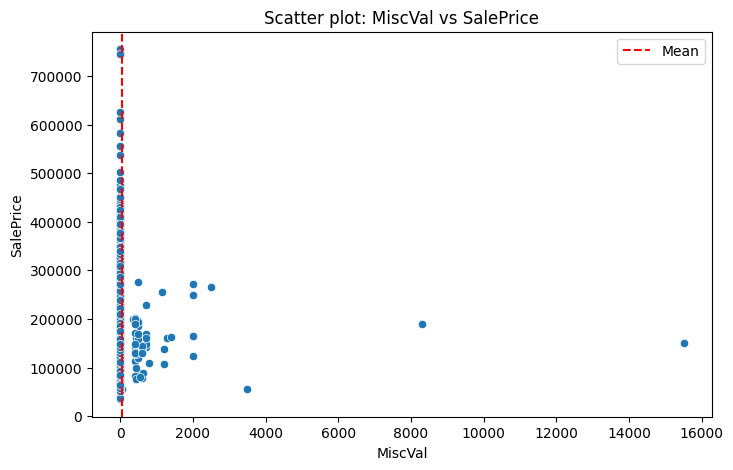

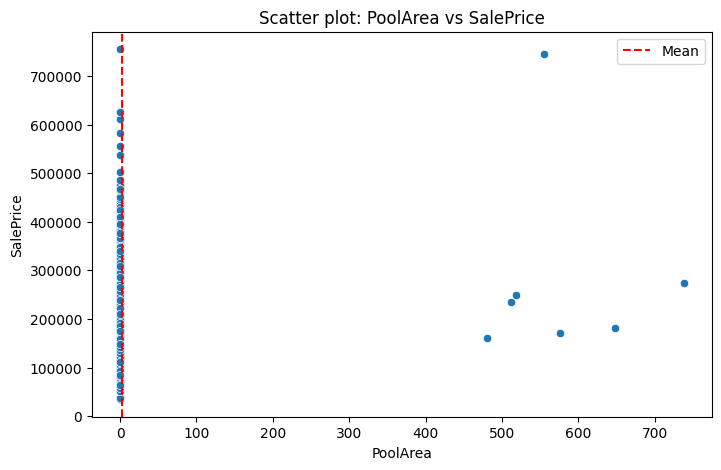

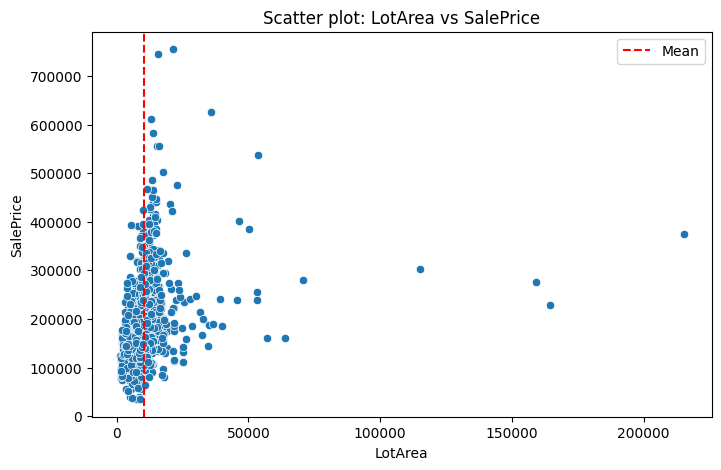

In [99]:
outlier_report, iqr_bounds = detect_outliers(df_train, target_col='SalePrice', visualize=True)

In [100]:
# Select only the features where removal is suggested
features_to_remove_outliers = outlier_report[outlier_report['Suggestion'].str.startswith('❌')]['Feature'].tolist()

In [101]:
# Remove rows in df_train that are outliers in any of the selected features
for feature in features_to_remove_outliers:
    lower, upper = iqr_bounds[feature]
    df_train = df_train[(df_train[feature] >= lower) & (df_train[feature] <= upper)]

In [102]:
# Clip those same features in the test set
for feature in features_to_remove_outliers:
    if feature in df_test.columns:
        lower, upper = iqr_bounds[feature]
        df_test[feature] = df_test[feature].clip(lower=lower, upper=upper)

In [103]:
print(f"{feature} - Before clip: min={df_test[feature].min()}, max={df_test[feature].max()}")
df_test[feature] = df_test[feature].clip(lower=lower, upper=upper)
print(f"{feature} - After clip: min={df_test[feature].min()}, max={df_test[feature].max()}")

OpenPorchSF - Before clip: min=0.0, max=170.0
OpenPorchSF - After clip: min=0.0, max=170.0


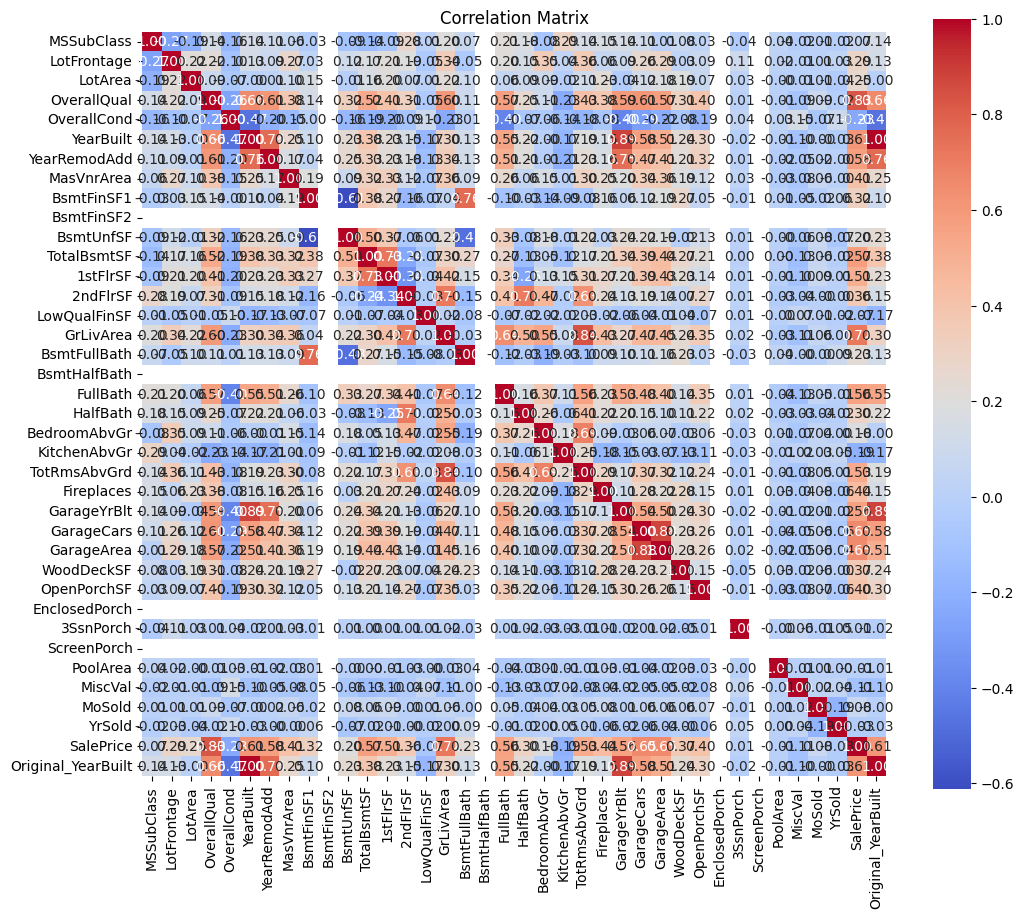

In [105]:
# EDA
# Checking the correlation between numerical features
numerical_df = df_train.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [106]:
# Calculate correlation matrix for numeric columns
corr_matrix = df_train.corr(numeric_only=True)

# Get absolute correlations with the target (e.g. SalePrice)
target_corr = corr_matrix['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False)

# Create a table of top 10 correlated features
top_corr_df = pd.DataFrame({
    'Feature': target_corr.index[:10],
    'Correlation with SalePrice': target_corr.values[:10]
})

# Display as a table
print("📋 Top 10 Features Most Correlated with SalePrice:")
print(top_corr_df.to_string(index=False))


📋 Top 10 Features Most Correlated with SalePrice:
           Feature  Correlation with SalePrice
       OverallQual                    0.829850
         GrLivArea                    0.722598
        GarageCars                    0.654234
        GarageArea                    0.650292
      ExterQual_TA                    0.637386
Original_YearBuilt                    0.611857
         YearBuilt                    0.611857
       BsmtQual_TA                    0.602523
    KitchenQual_TA                    0.586207
      YearRemodAdd                    0.577996


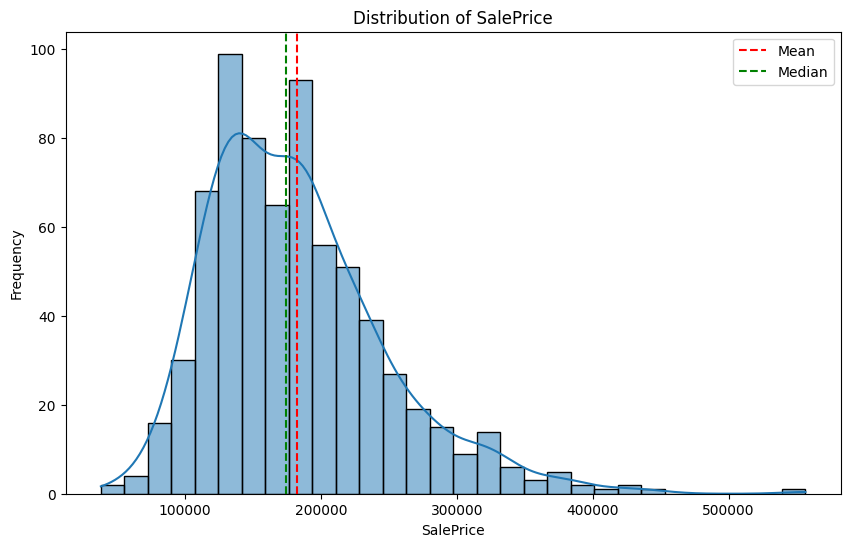

In [107]:
#visualizing the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.axvline(df_train['SalePrice'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df_train['SalePrice'].median(), color='g', linestyle='--', label='Median')
plt.legend()
plt.show()

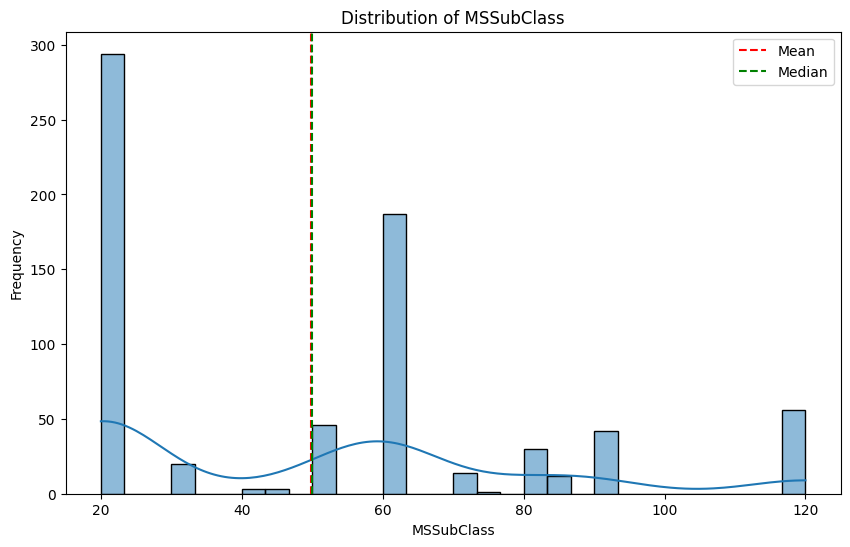

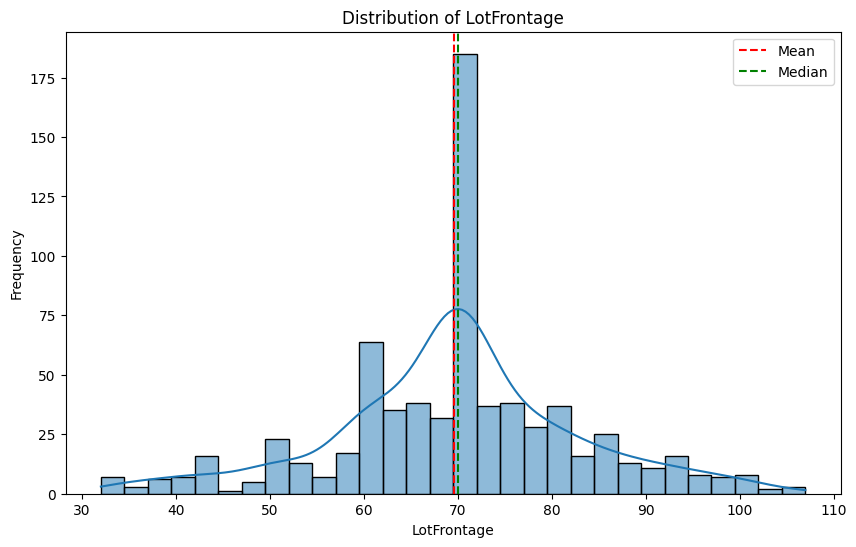

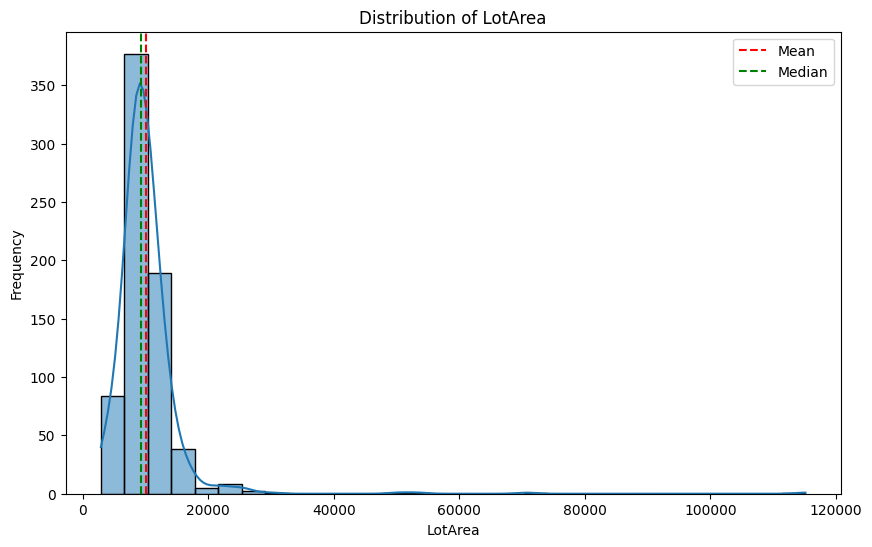

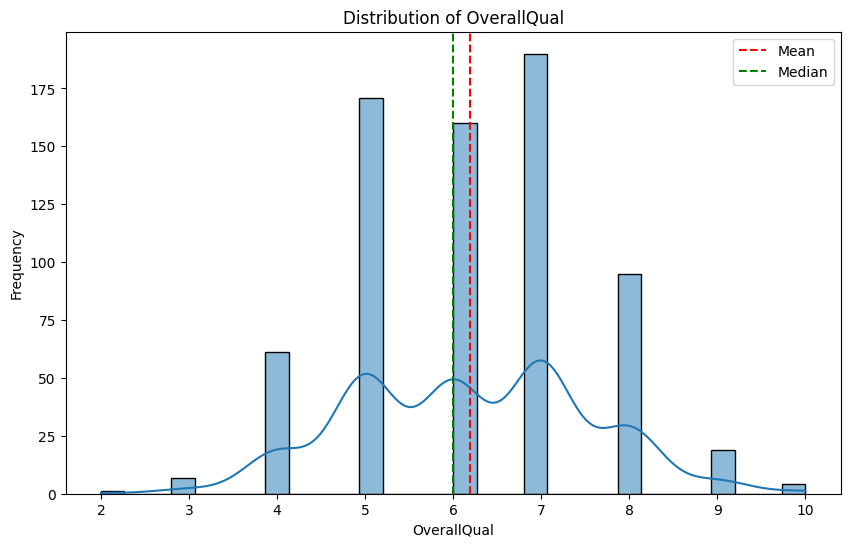

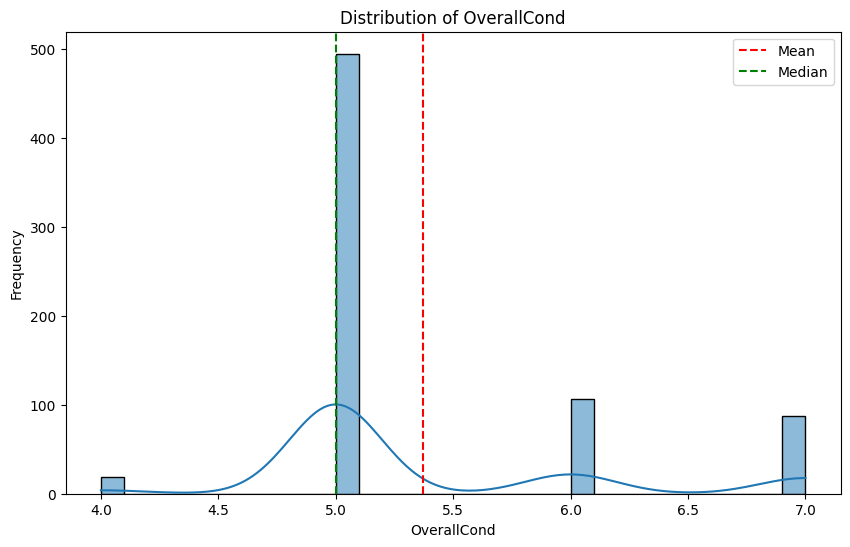

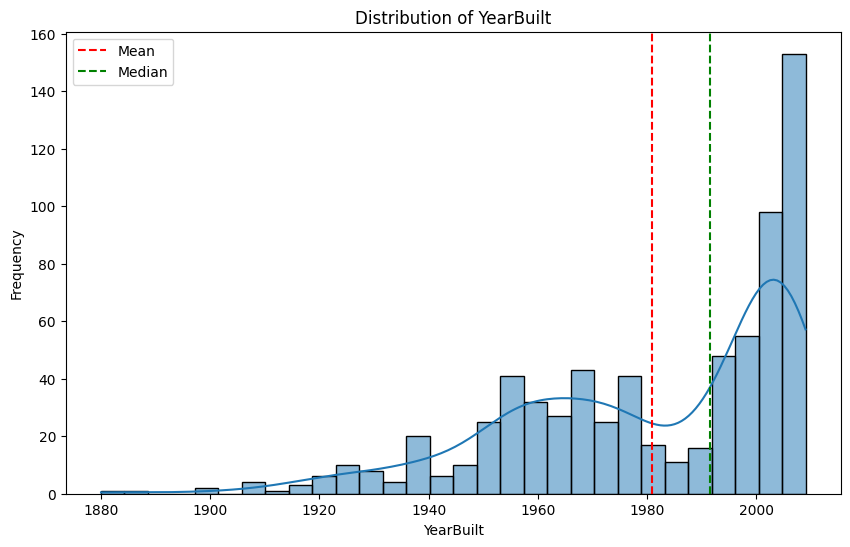

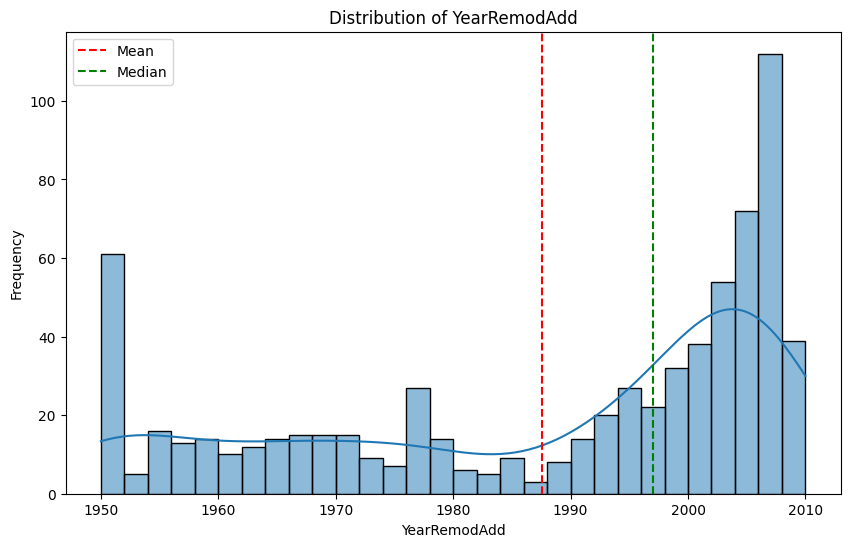

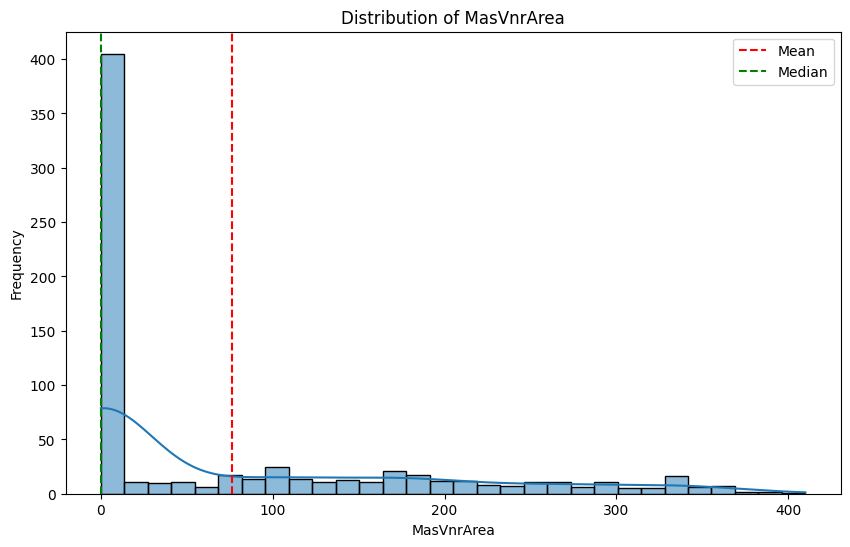

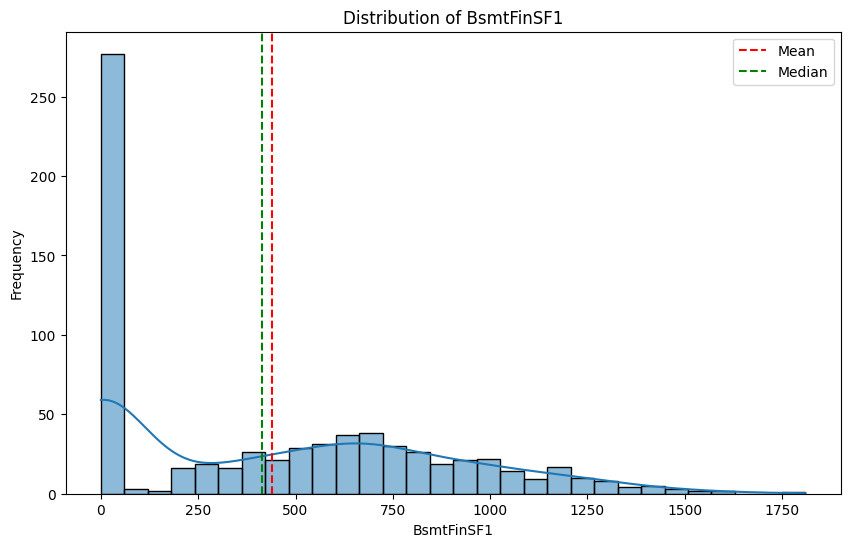

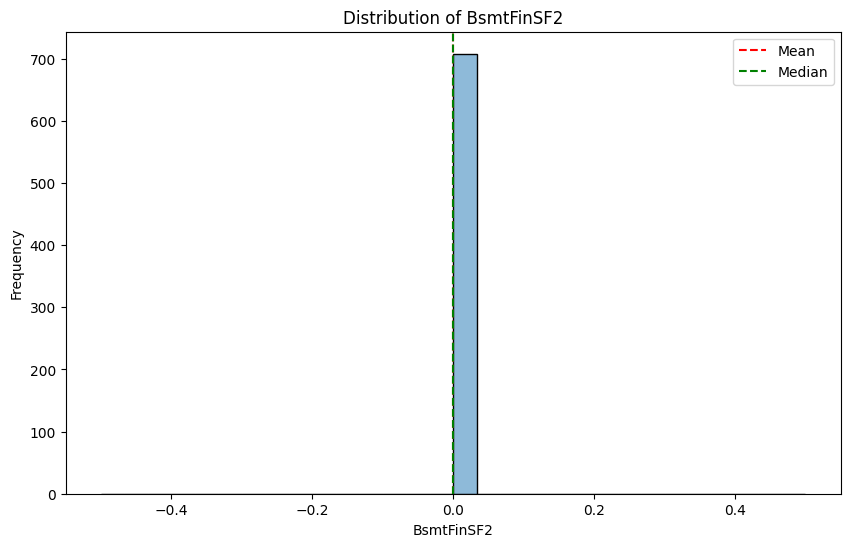

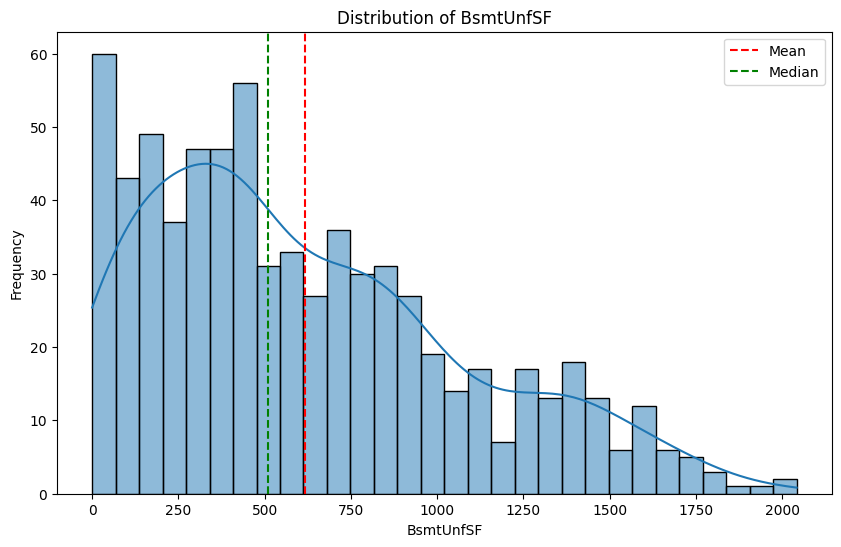

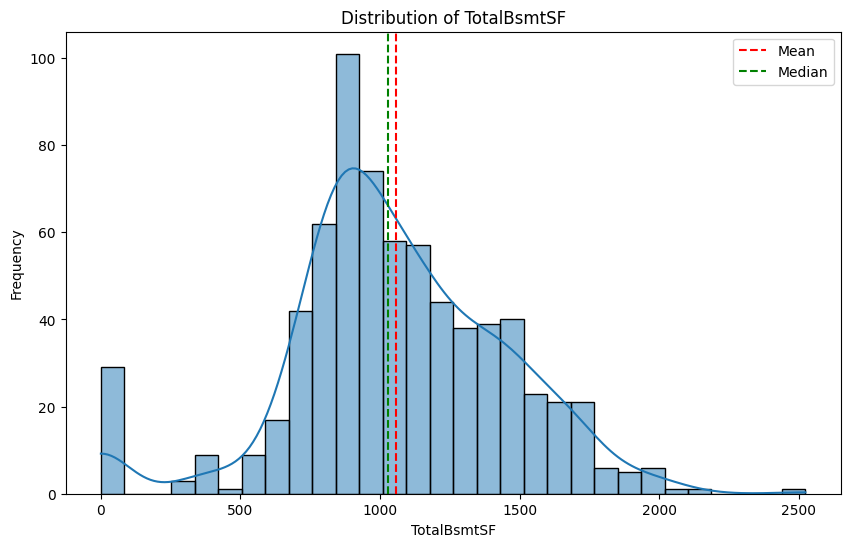

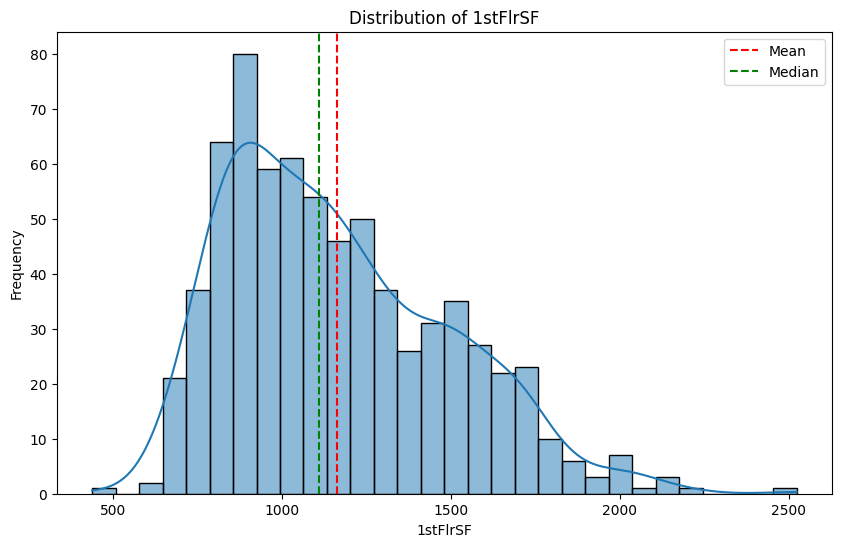

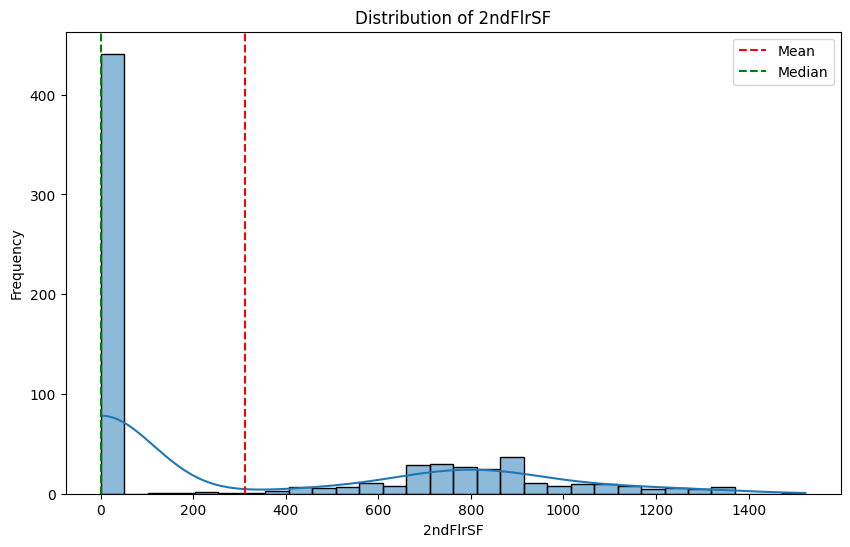

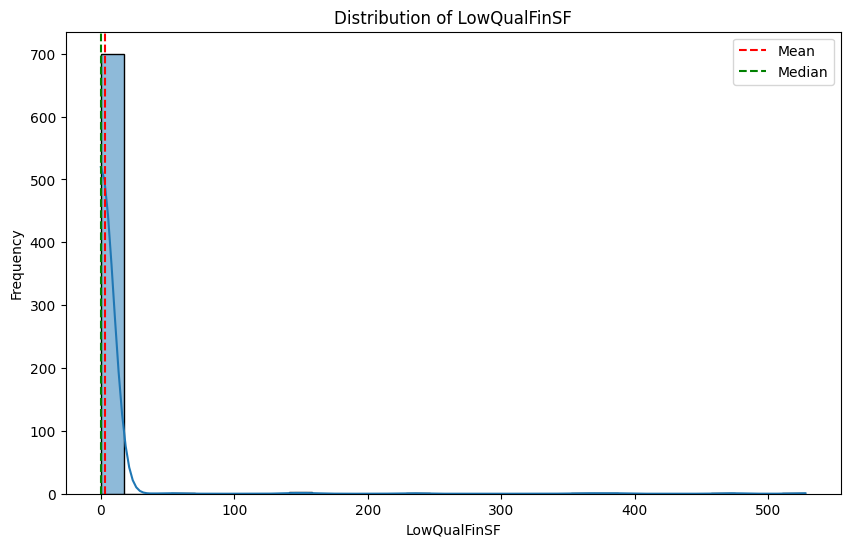

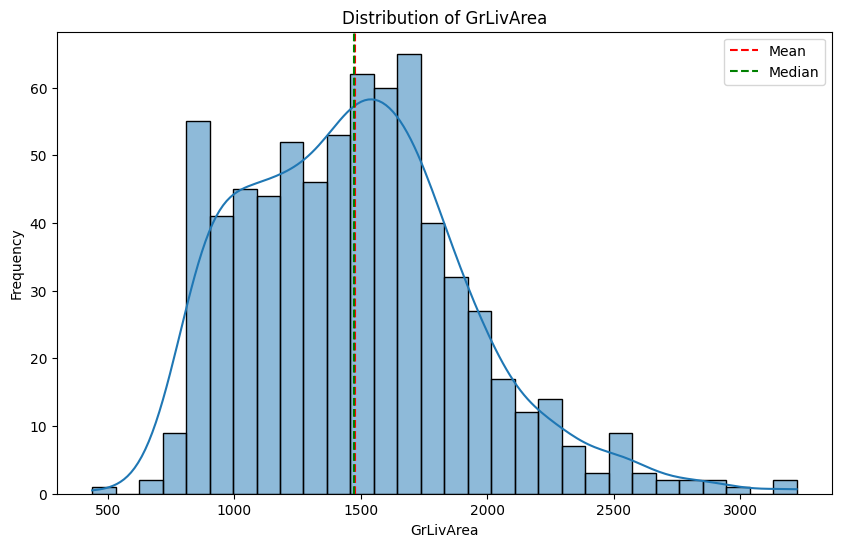

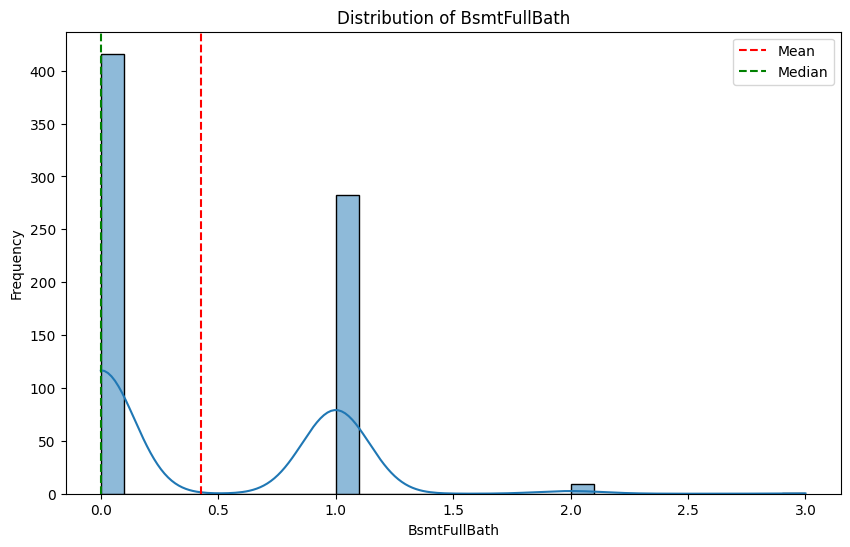

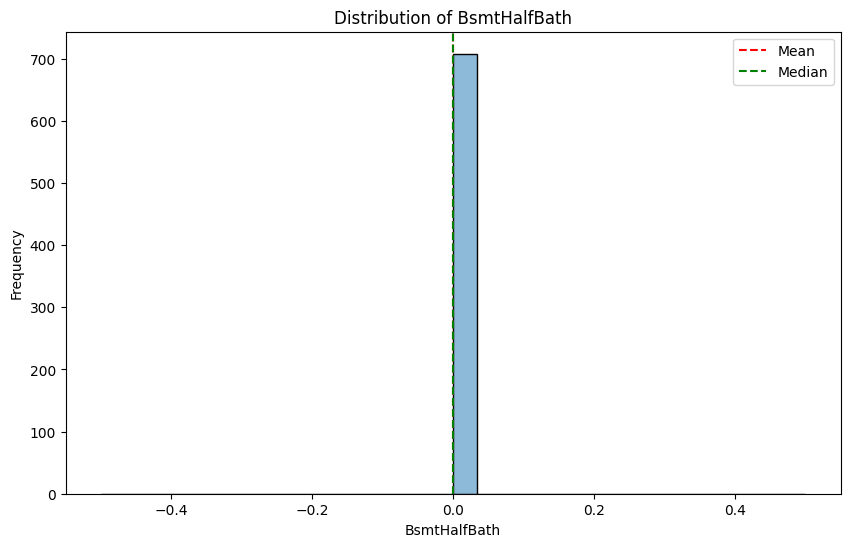

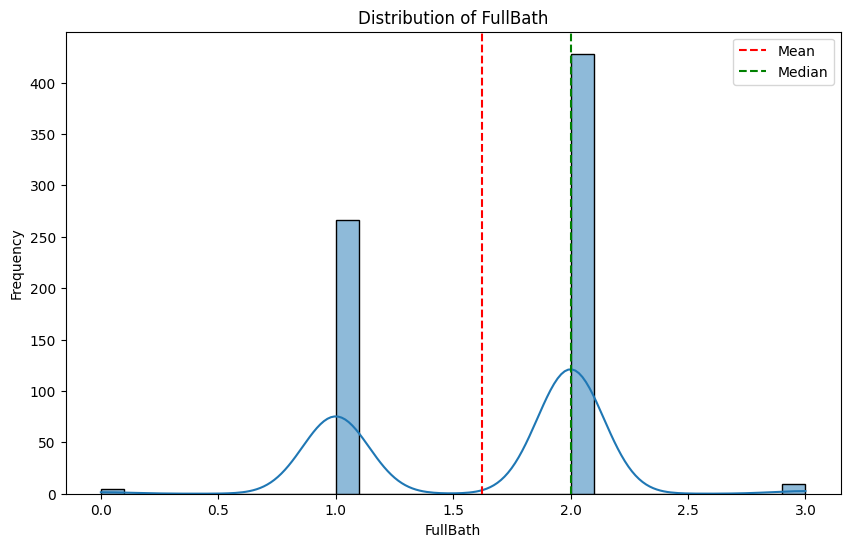

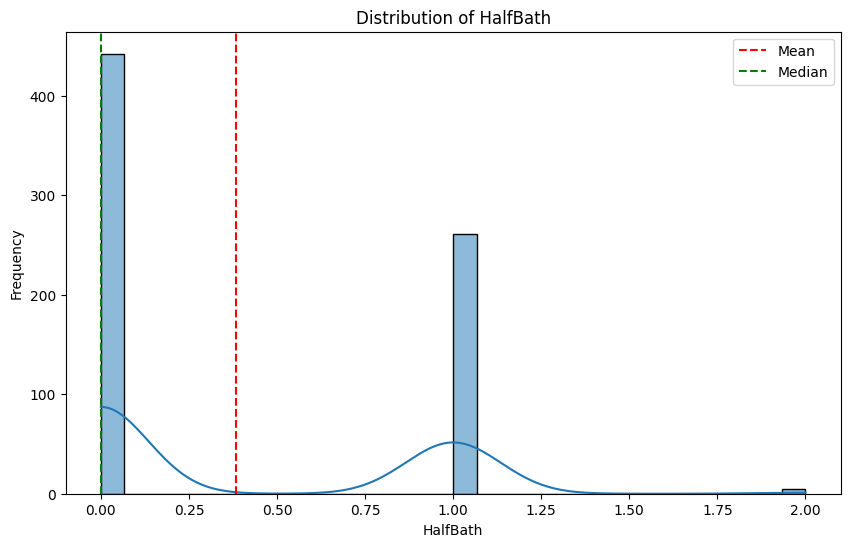

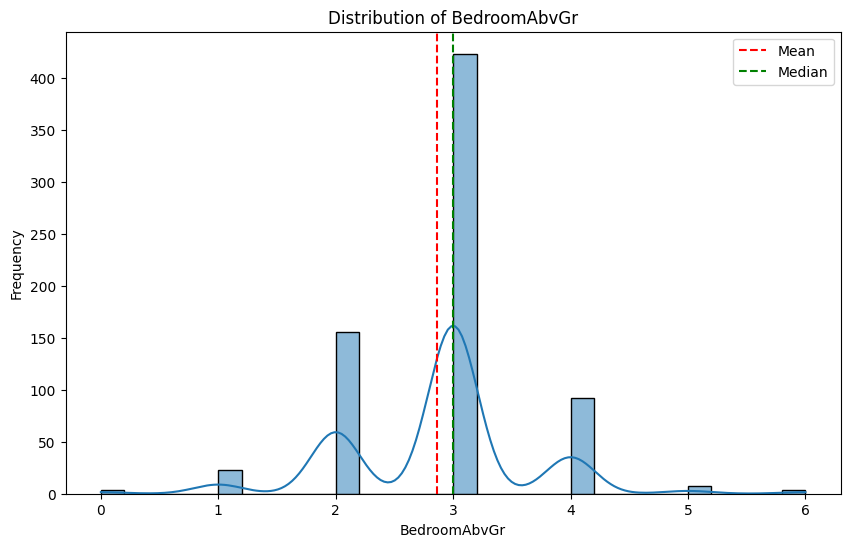

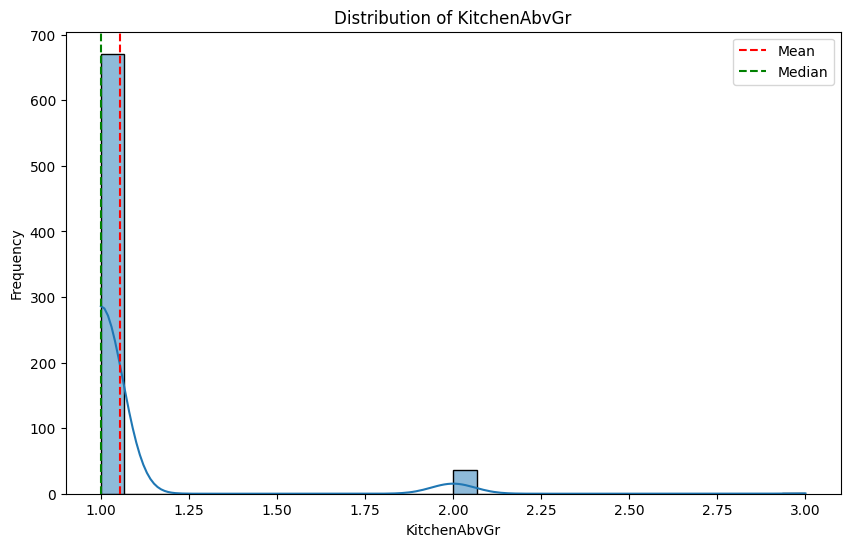

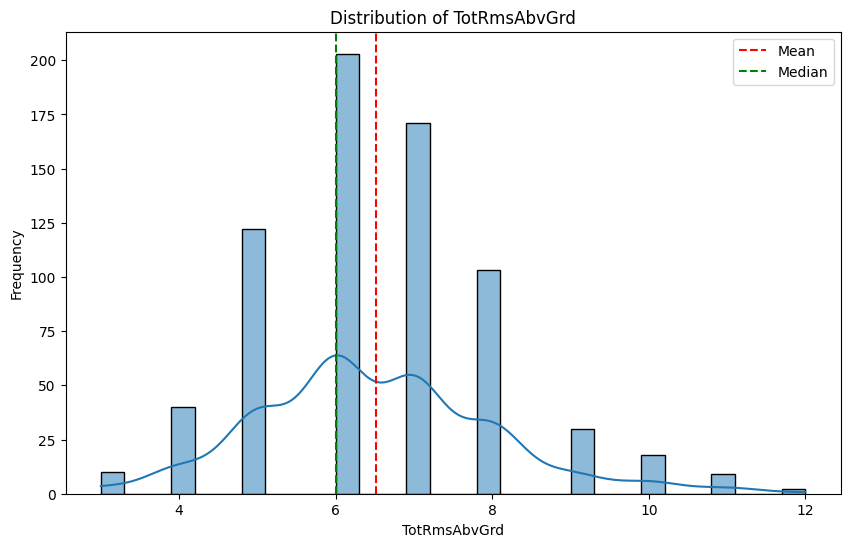

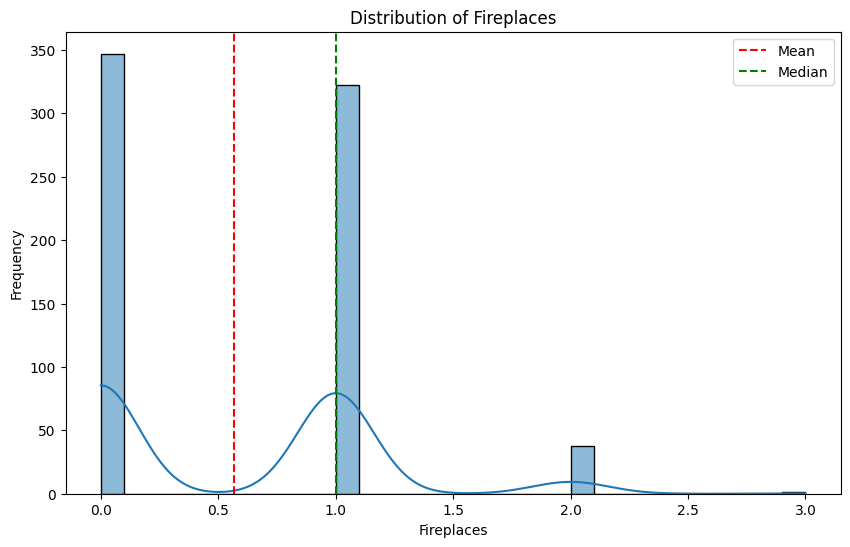

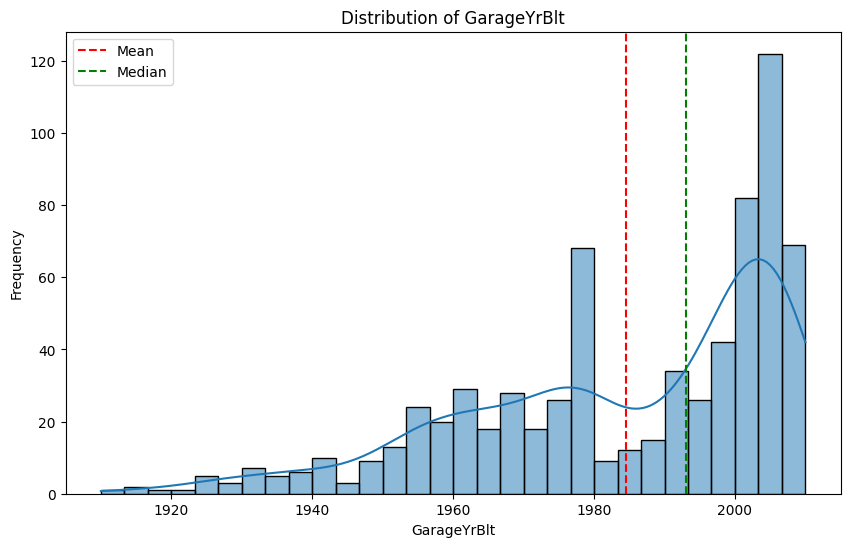

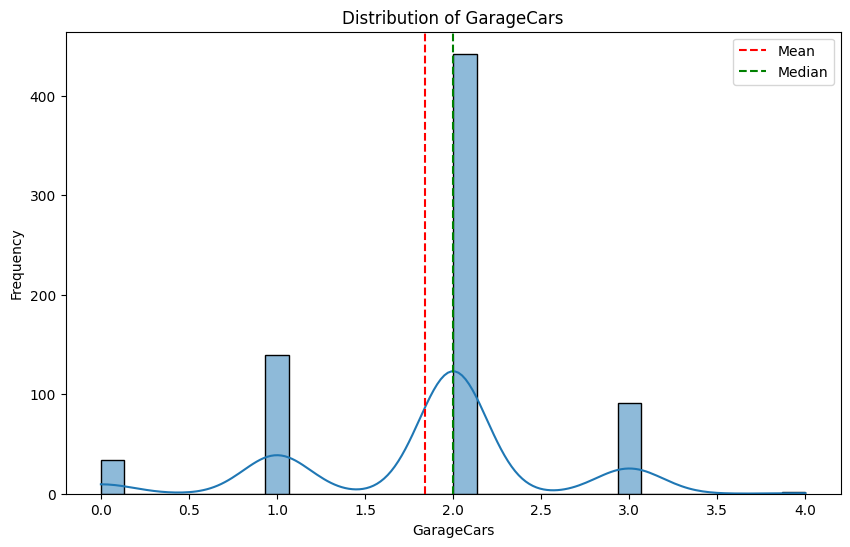

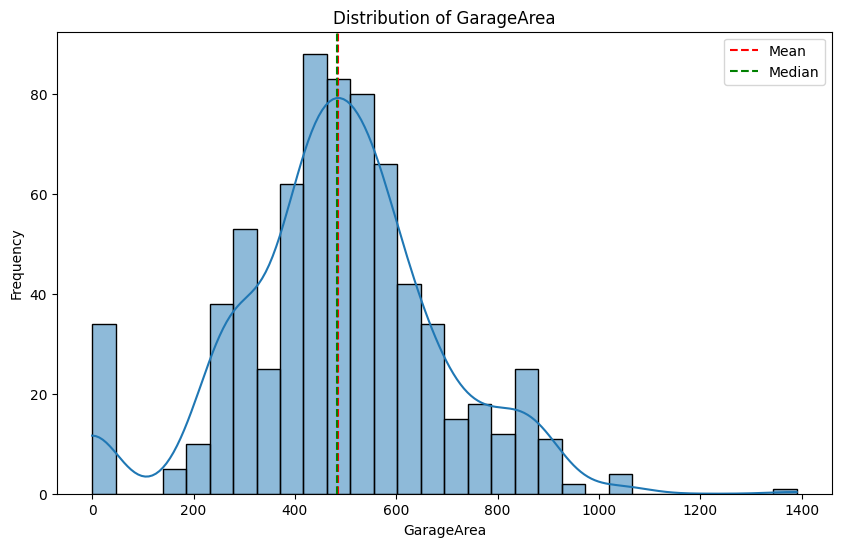

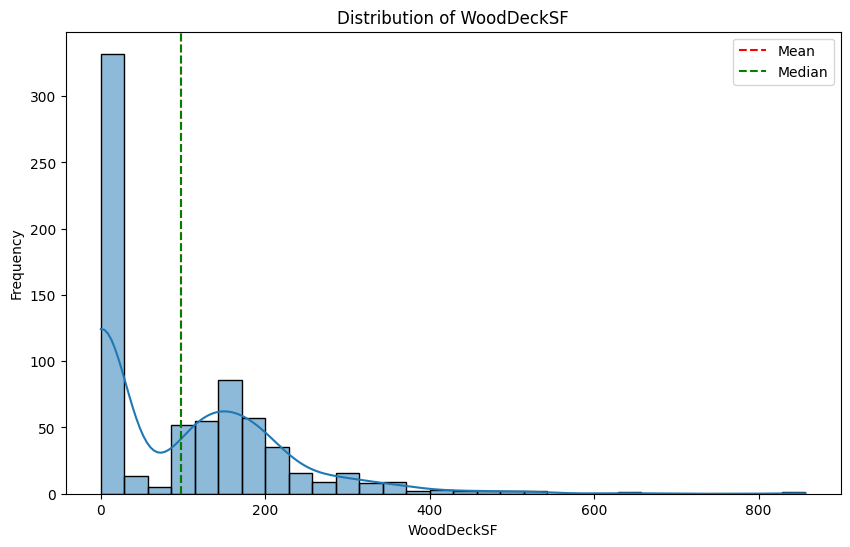

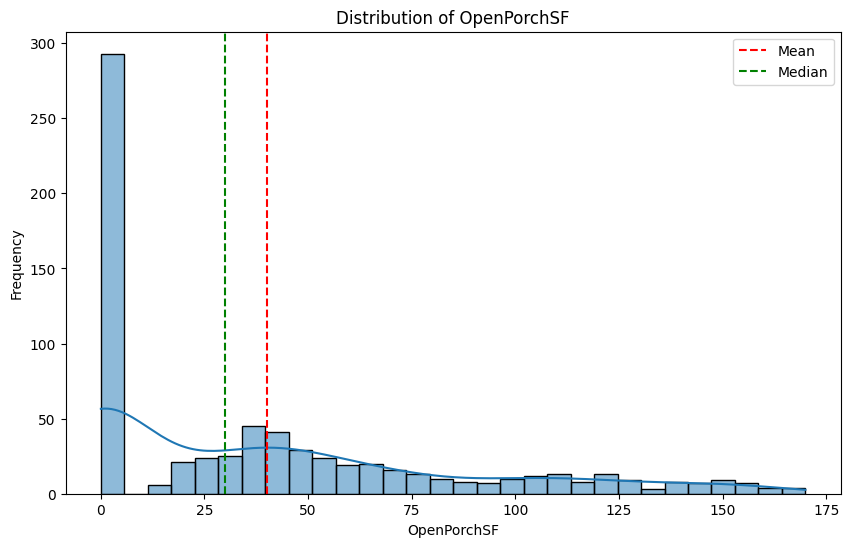

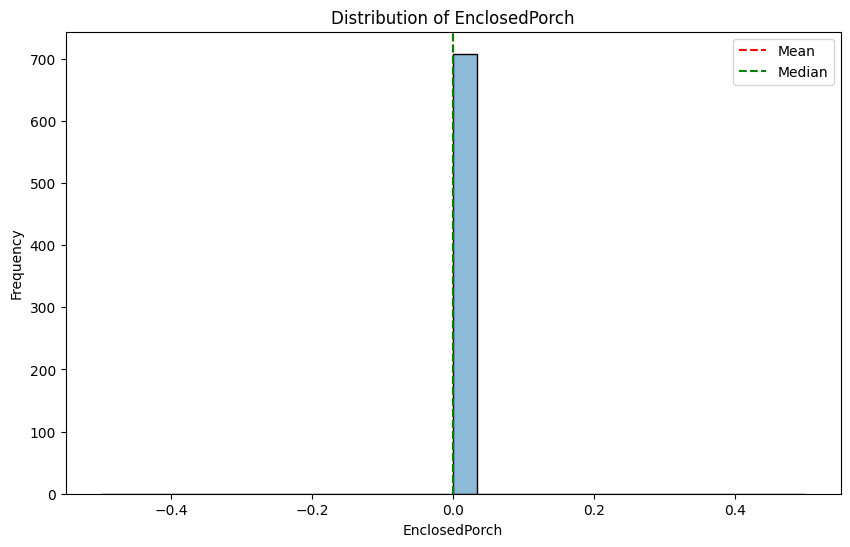

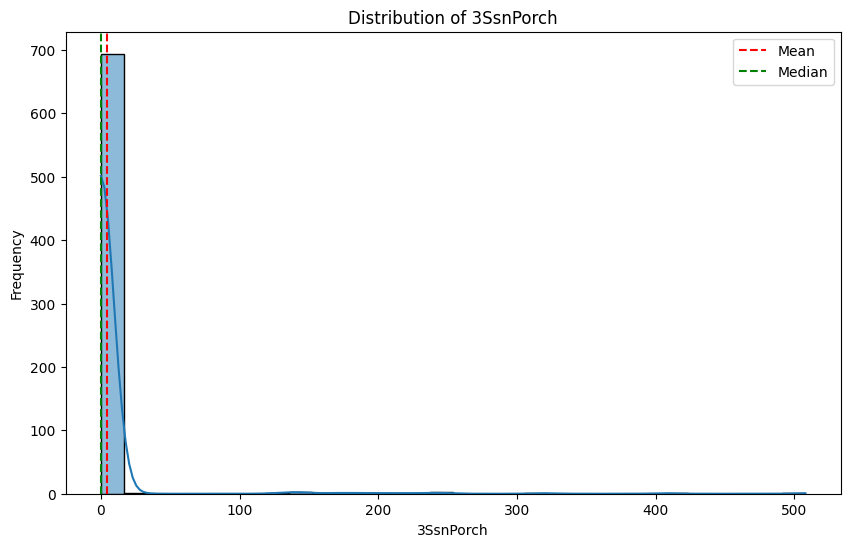

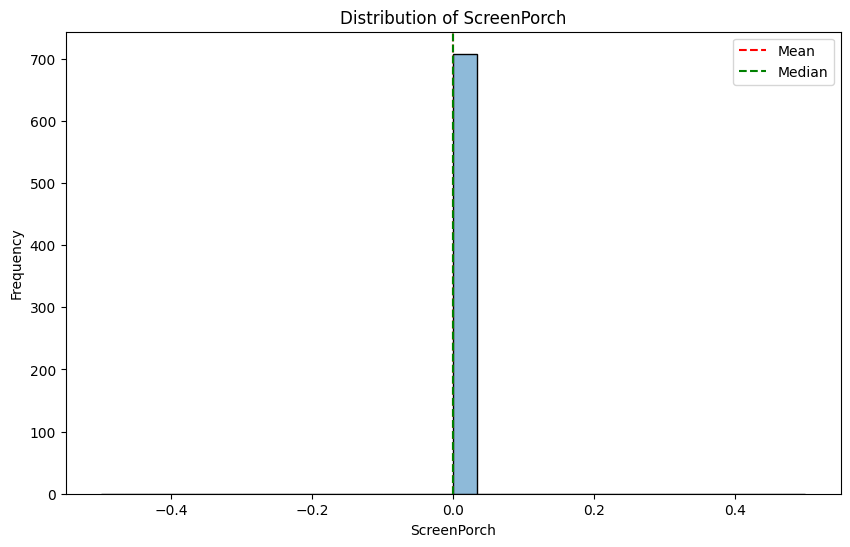

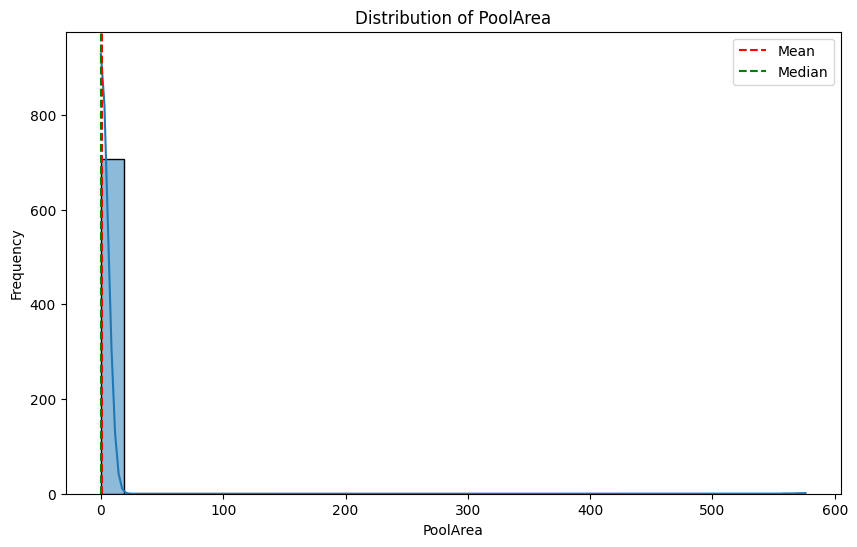

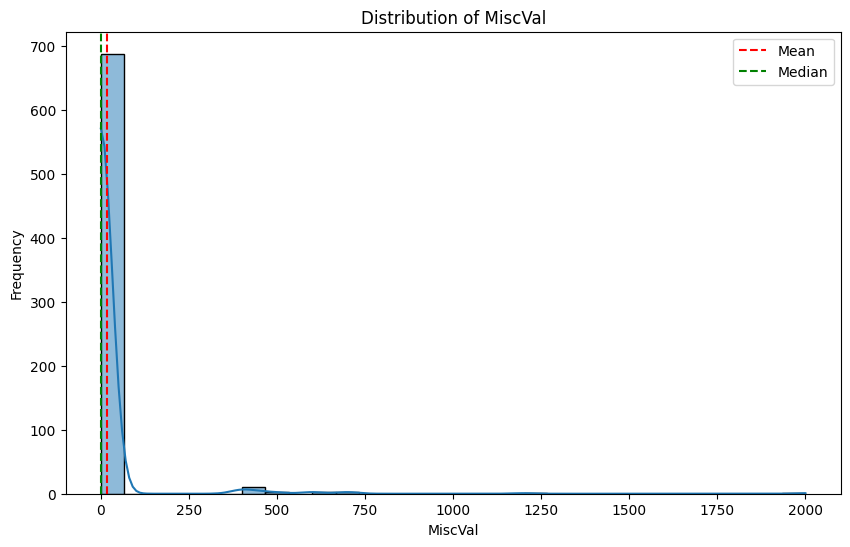

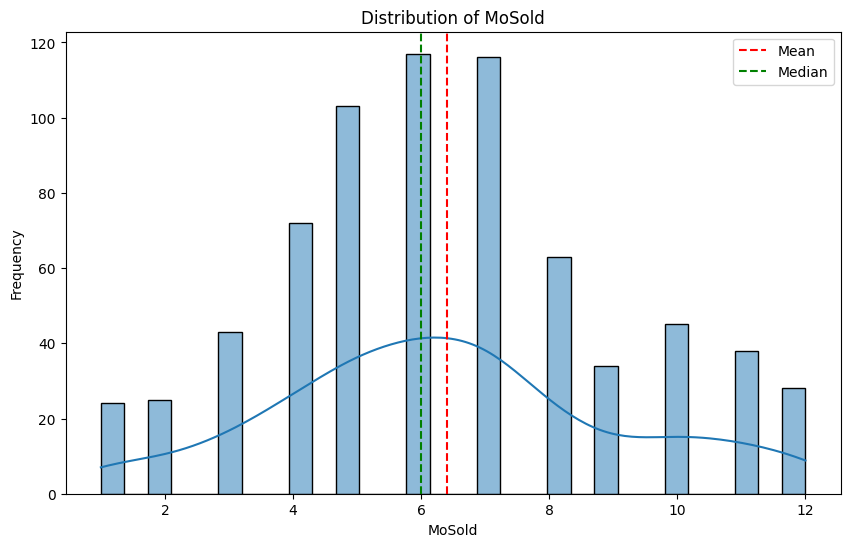

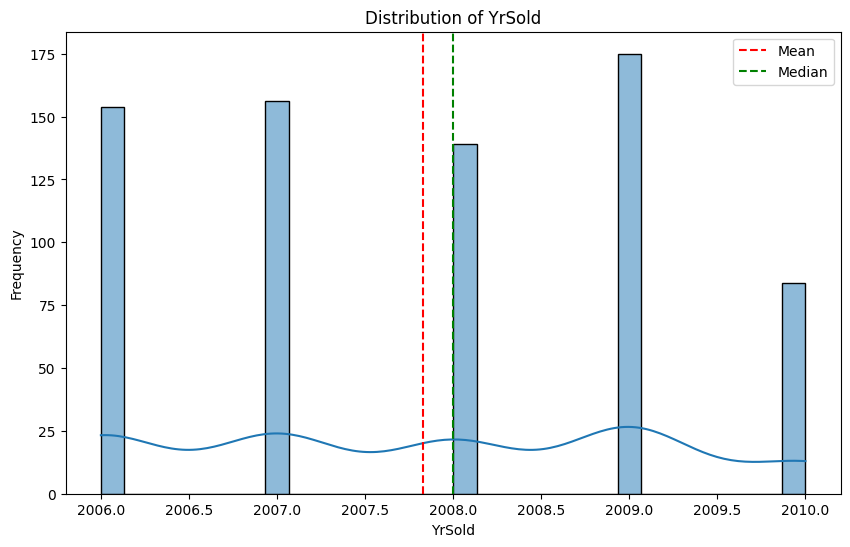

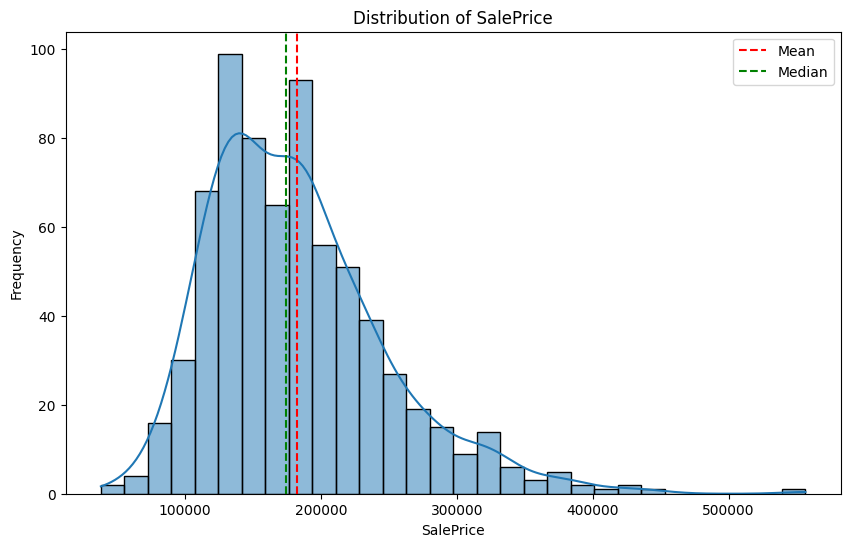

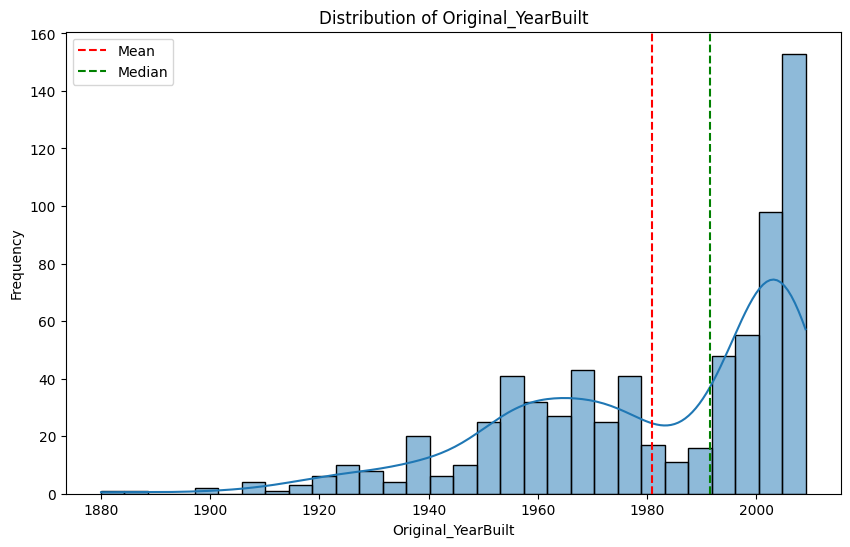

In [108]:
# visualizing the all numerical features
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.axvline(df_train[feature].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df_train[feature].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()      

# we need to analysis the numeric features after EDA, and to get the recommendations of them 

In [109]:
def analyze_numeric_features(df, target_col='SalePrice'):
	"""
	Analyze numeric features: returns a DataFrame with feature name, skewness, outlier %, and suggestion.
	"""
	numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(target_col)
	results = []
	for col in numeric_cols:
		series = df[col].dropna()
		Q1 = series.quantile(0.25)
		Q3 = series.quantile(0.75)
		IQR = Q3 - Q1
		lower = Q1 - 1.5 * IQR
		upper = Q3 + 1.5 * IQR
		outliers = series[(series < lower) | (series > upper)]
		outlier_pct = len(outliers) / len(series) * 100
		skewness = skew(series)
		if outlier_pct < 0.5:
			suggestion = "✅ Keep: Very few outliers, likely fine"
		elif outlier_pct < 5:
			suggestion = "⚠️ Review: May influence modeling"
		else:
			suggestion = "❌ Consider removing or binning"
		results.append({
			'Feature': col,
			'Skewness': round(skewness, 2),
			'Outlier %': round(outlier_pct, 2),
			'Suggestion': suggestion
		})
	return pd.DataFrame(results).sort_values(by='Outlier %', ascending=False)

analysis_result = analyze_numeric_features(df_train)
print(analysis_result.to_string(index=False))

           Feature  Skewness  Outlier %                             Suggestion
        GarageCars     -0.52      37.57         ❌ Consider removing or binning
      TotRmsAbvGrd      0.49      15.40         ❌ Consider removing or binning
       LotFrontage     -0.12       8.19         ❌ Consider removing or binning
        GarageArea     -0.01       7.34         ❌ Consider removing or binning
      KitchenAbvGr      4.30       5.23         ❌ Consider removing or binning
           LotArea      9.75       4.66      ⚠️ Review: May influence modeling
       TotalBsmtSF     -0.23       4.52      ⚠️ Review: May influence modeling
           MiscVal      9.96       2.97      ⚠️ Review: May influence modeling
      BedroomAbvGr     -0.05       2.12      ⚠️ Review: May influence modeling
         3SsnPorch      9.70       1.98      ⚠️ Review: May influence modeling
        WoodDeckSF      1.41       1.69      ⚠️ Review: May influence modeling
       OpenPorchSF      1.02       1.41      ⚠️ Revi

In [110]:
#  Identify top 10 correlated features with target
top10_corr = df_train.corr()['SalePrice'].abs().sort_values(ascending=False).head(11).index.drop('SalePrice')
#  Tag importance
analysis_result['IsTop10'] = analysis_result['Feature'].isin(top10_corr)
#  Handle features based on suggestions
for _, row in analysis_result.iterrows():
    feature = row['Feature']
    suggestion = row['Suggestion']
    is_important = row['IsTop10']

    if suggestion == "❌ Consider removing or binning":
        if not is_important:
            # Remove the column
            df_train.drop(columns=[feature], inplace=True)
        else:
            # Keep the feature if it's important, but optionally clip or bin if desired
            Q1 = df_train[feature].quantile(0.25)
            Q3 = df_train[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_train[feature] = df_train[feature].clip(lower=lower, upper=upper)

    elif suggestion == "⚠️ Review: May influence modeling":
        # Apply outlier clipping for all features under "review"
        Q1 = df_train[feature].quantile(0.25)
        Q3 = df_train[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_train[feature] = df_train[feature].clip(lower=lower, upper=upper)

#  print the updated DataFrame shape and columns
print("Updated DataFrame shape:", df_train.shape)
print("Remaining features:", df_train.columns)


Updated DataFrame shape: (708, 228)
Remaining features: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=228)


In [111]:

def apply_log_by_recommendation(df, analysis_result):
	# Select features with high skewness or outlier % based on 'Suggestion'
	
	log_features = analysis_result[
		analysis_result['Suggestion'].str.contains('log', case=False, na=False)
	]['Feature'].tolist()
	
	# let's log-transform features with high skewness or flagged for review/removal
	log_features = analysis_result[
		analysis_result['Suggestion'].str.startswith(('⚠️', '❌'))
	]['Feature'].tolist()
	df_logged = df.copy()
	for feature in log_features:
		if feature in df_logged.columns:
			df_logged[feature] = np.log1p(df_logged[feature])
	return df_logged, log_features

df_train_logged, log_features = apply_log_by_recommendation(df_train, analysis_result)

In [112]:
# Apply log1p to test set features that were transformed in training
# Collect skipped features due to null or non-positive values

skipped_features = []

for col in log_features:
    if col in df_test.columns:
        if df_test[col].notnull().all() and (df_test[col] > 0).all():
            df_test[col] = np.log1p(df_test[col])
        else:
            print(f"⚠️ Skipped {col} in test set (nulls or non-positive values)")
            skipped_features.append(col)

⚠️ Skipped GarageCars in test set (nulls or non-positive values)
⚠️ Skipped GarageArea in test set (nulls or non-positive values)
⚠️ Skipped KitchenAbvGr in test set (nulls or non-positive values)
⚠️ Skipped TotalBsmtSF in test set (nulls or non-positive values)
⚠️ Skipped MiscVal in test set (nulls or non-positive values)
⚠️ Skipped BedroomAbvGr in test set (nulls or non-positive values)
⚠️ Skipped 3SsnPorch in test set (nulls or non-positive values)
⚠️ Skipped WoodDeckSF in test set (nulls or non-positive values)
⚠️ Skipped OpenPorchSF in test set (nulls or non-positive values)
⚠️ Skipped LowQualFinSF in test set (nulls or non-positive values)
⚠️ Skipped MasVnrArea in test set (nulls or non-positive values)
⚠️ Skipped BsmtUnfSF in test set (nulls or non-positive values)


In [113]:
for col in skipped_features:
    if col in df_train_logged.columns:
        train_col = df_train_logged[col]
        num_missing = df_train[col].isnull().sum()
        num_non_positive = (df_train[col] <= 0).sum()

        print(f"🧪 Feature: {col}")
        print(f" - In training: {len(train_col)} values after log1p")
        print(f" - Missing values in original train set: {num_missing}")
        print(f" - Non-positive values in original train set: {num_non_positive}")
        print(f" - Min value after log1p: {train_col.min():.3f}")
        print(f" - Max value after log1p: {train_col.max():.3f}")
        print("------")
    else:
        print(f"❗Feature {col} was not used in training (possibly dropped earlier)")

🧪 Feature: GarageCars
 - In training: 708 values after log1p
 - Missing values in original train set: 0
 - Non-positive values in original train set: 0
 - Min value after log1p: 1.099
 - Max value after log1p: 1.099
------
🧪 Feature: GarageArea
 - In training: 708 values after log1p
 - Missing values in original train set: 0
 - Non-positive values in original train set: 0
 - Min value after log1p: 4.568
 - Max value after log1p: 6.781
------
❗Feature KitchenAbvGr was not used in training (possibly dropped earlier)
🧪 Feature: TotalBsmtSF
 - In training: 708 values after log1p
 - Missing values in original train set: 0
 - Non-positive values in original train set: 0
 - Min value after log1p: 4.994
 - Max value after log1p: 7.609
------
🧪 Feature: MiscVal
 - In training: 708 values after log1p
 - Missing values in original train set: 0
 - Non-positive values in original train set: 708
 - Min value after log1p: 0.000
 - Max value after log1p: 0.000
------
🧪 Feature: BedroomAbvGr
 - In trai

In [114]:
for col in skipped_features:
    if col in df_test.columns and col in df_train_logged.columns:
        # Fill NaNs with median of the training set
        test_col = df_test[col].fillna(df_train[col].median())
        
        # Replace non-positive values with a small positive constant
        test_col = test_col.apply(lambda x: x if x > 0 else 0.01)

        # Apply log1p
        df_test[col] = np.log1p(test_col)
        print(f"✅ Fixed and transformed {col} in test set.")
    else:
        print(f"⚠️ {col} not in both train and test — skipped fixing.")

✅ Fixed and transformed GarageCars in test set.
✅ Fixed and transformed GarageArea in test set.
⚠️ KitchenAbvGr not in both train and test — skipped fixing.
✅ Fixed and transformed TotalBsmtSF in test set.
✅ Fixed and transformed MiscVal in test set.
✅ Fixed and transformed BedroomAbvGr in test set.
✅ Fixed and transformed 3SsnPorch in test set.
✅ Fixed and transformed WoodDeckSF in test set.
✅ Fixed and transformed OpenPorchSF in test set.
✅ Fixed and transformed LowQualFinSF in test set.
✅ Fixed and transformed MasVnrArea in test set.
✅ Fixed and transformed BsmtUnfSF in test set.


In [115]:
# Clean up log_features to only include columns present in both datasets
log_features = [col for col in log_features if col in df_train_logged.columns and col in df_test.columns]

In [116]:
for col in log_features:
    test_col = df_test[col]

    # Fill missing with training set median
    test_col = test_col.fillna(df_train[col].median())

    # Replace non-positive with small positive constant
    test_col = test_col.apply(lambda x: x if x > 0 else 0.01)

    # Apply log1p
    df_test[col] = np.log1p(test_col)

    print(f"✅ Log-transformed {col} in test set.")

✅ Log-transformed GarageCars in test set.
✅ Log-transformed GarageArea in test set.
✅ Log-transformed LotArea in test set.
✅ Log-transformed TotalBsmtSF in test set.
✅ Log-transformed MiscVal in test set.
✅ Log-transformed BedroomAbvGr in test set.
✅ Log-transformed 3SsnPorch in test set.
✅ Log-transformed WoodDeckSF in test set.
✅ Log-transformed OpenPorchSF in test set.
✅ Log-transformed GrLivArea in test set.
✅ Log-transformed LowQualFinSF in test set.
✅ Log-transformed MasVnrArea in test set.
✅ Log-transformed BsmtUnfSF in test set.
✅ Log-transformed 1stFlrSF in test set.


In [117]:
X_train = df_train_logged.drop(columns=['SalePrice']) 

# Ensure test set has all columns in the same order as train set
missing_cols = set(X_train.columns) - set(df_test.columns)
for col in missing_cols:
	df_test[col] = 0  # or np.nan, or another default value

# Also, drop any extra columns in test not in train
X_test = df_test[X_train.columns]

print("✅ Train and test feature shapes:", X_train.shape, X_test.shape)

✅ Train and test feature shapes: (708, 227) (1459, 227)


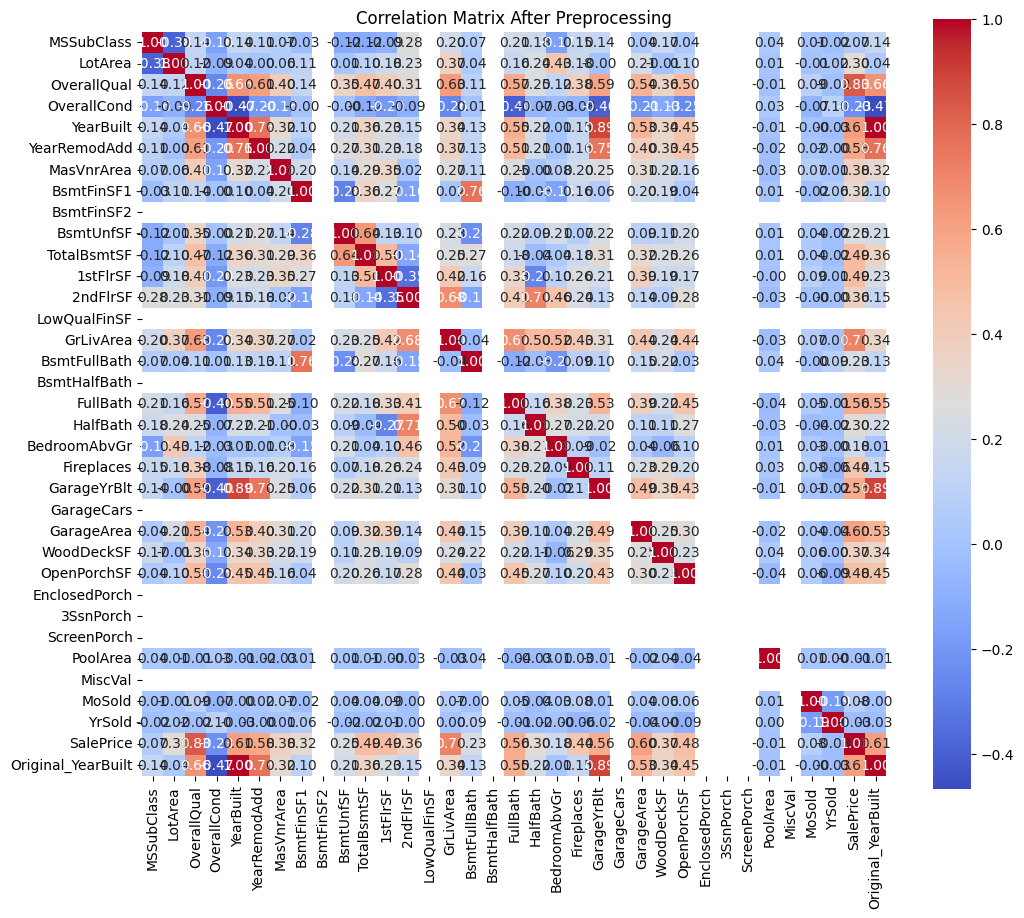

In [118]:
# EDA again after all the preprocessing
# Checking the correlation between numerical features after preprocessing
numerical_df = df_train_logged.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix After Preprocessing')
plt.show()


🔝 Top 10 Features Most Correlated with SalePrice:
['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual_TA', 'YearBuilt', 'Original_YearBuilt', 'BsmtQual_TA', 'GarageArea', 'KitchenQual_TA', 'YearRemodAdd']


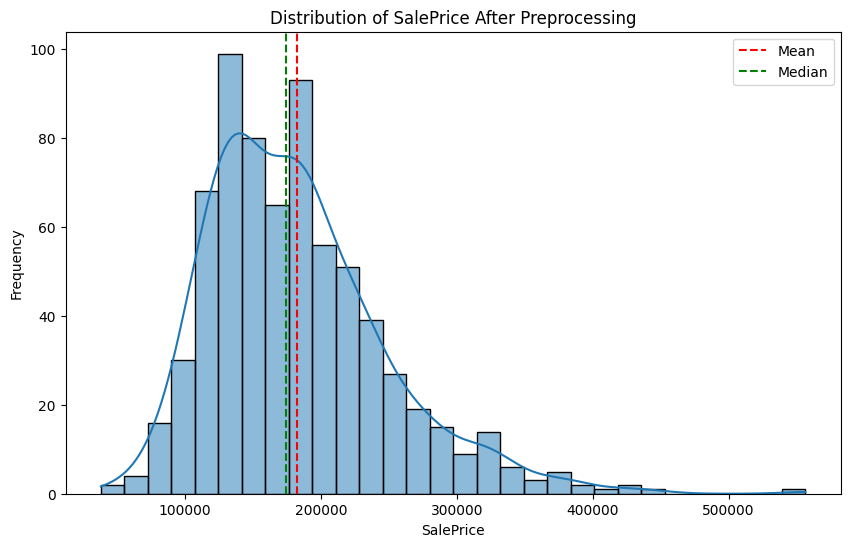

In [119]:
# displaying the top 10 features most correlated with SalePrice after preprocessing
corr_matrix = df_train_logged.corr(numeric_only=True)
top_10_features = corr_matrix['SalePrice'].abs().nlargest(10).index.tolist()
print("\n🔝 Top 10 Features Most Correlated with SalePrice:")
print(top_10_features)
# visualizing the distribution of SalePrice after preprocessing
plt.figure(figsize=(10, 6))
sns.histplot(df_train_logged['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice After Preprocessing')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.axvline(df_train_logged['SalePrice'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df_train_logged['SalePrice'].median(), color='g', linestyle='--', label='Median')
plt.legend()
plt.show()

In [120]:
# 1. HouseAge
if 'Original_YearBuilt' in df_train_logged.columns:
    df_train_logged['HouseAge'] = 2025 - df_train_logged['Original_YearBuilt']

# 2. TotalBath
df_train_logged['TotalBath'] = 0
if 'FullBath' in df_train_logged.columns:
    df_train_logged['TotalBath'] += df_train_logged['FullBath']
if 'HalfBath' in df_train_logged.columns:
    df_train_logged['TotalBath'] += df_train_logged['HalfBath'] * 0.5
if 'BsmtFullBath' in df_train_logged.columns:
    df_train_logged['TotalBath'] += df_train_logged['BsmtFullBath']

# 3. TotalRooms 
room_cols = ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
df_train_logged['TotalRooms'] = df_train_logged[[
    col for col in room_cols if col in df_train_logged.columns
]].sum(axis=1)

# 4. Dropping the original columns that are not needed anymore
columns_to_drop = ['Original_YearBuilt', 'FullBath', 'HalfBath', 'BsmtFullBath',
                   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
df_train_logged.drop(columns=[col for col in columns_to_drop if col in df_train_logged.columns], inplace=True)

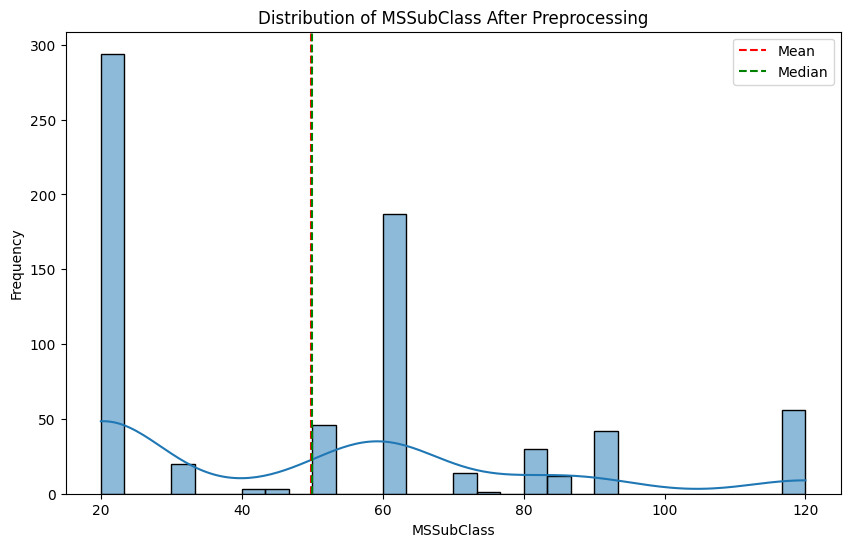

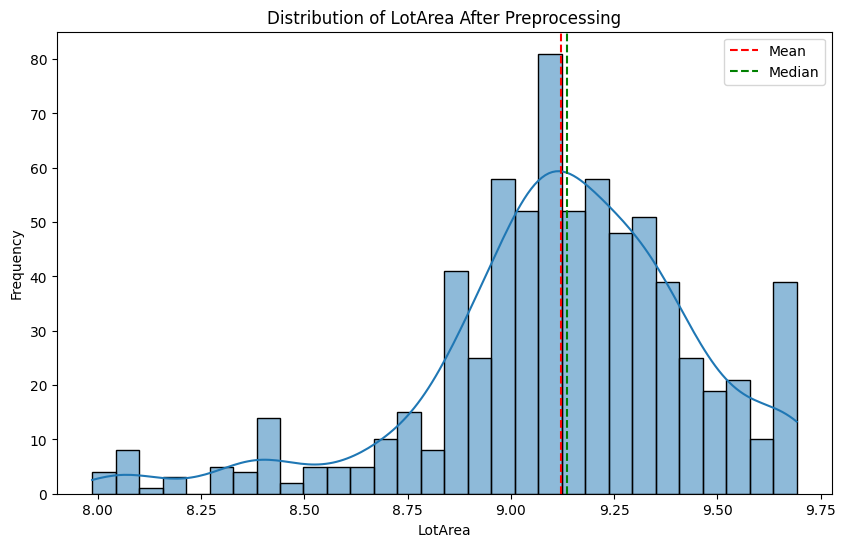

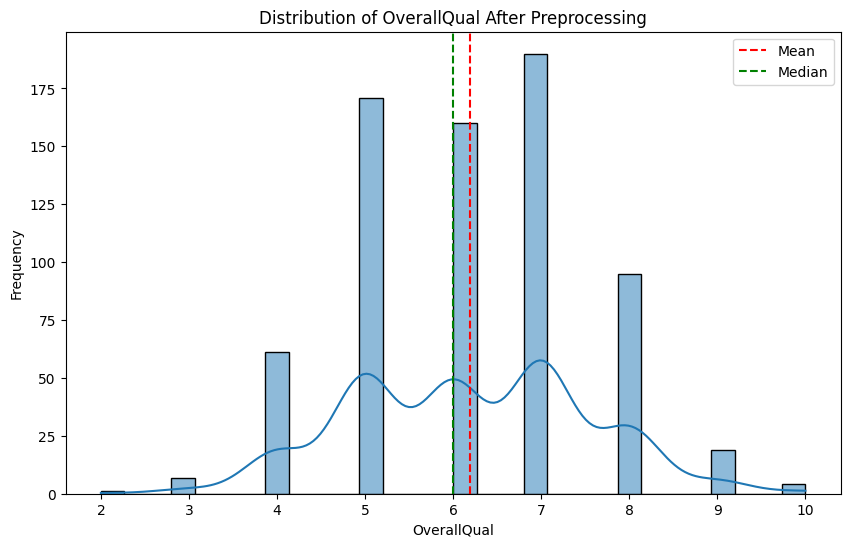

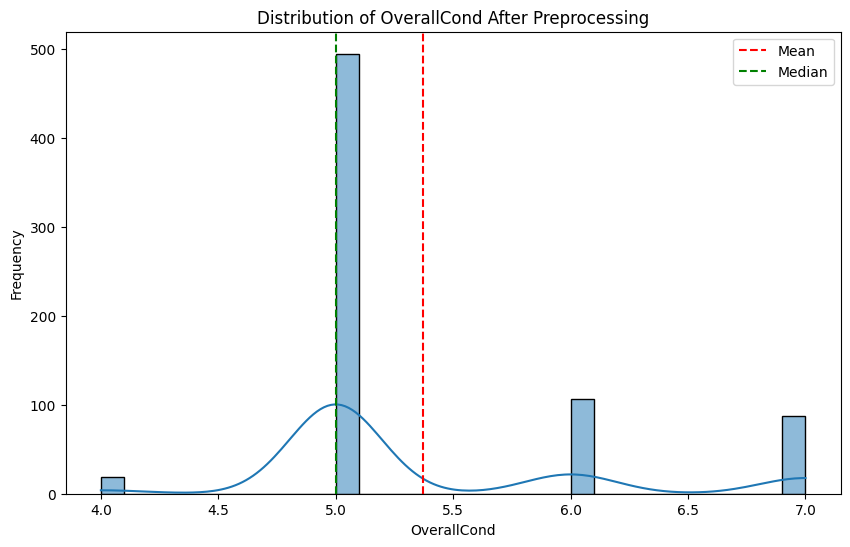

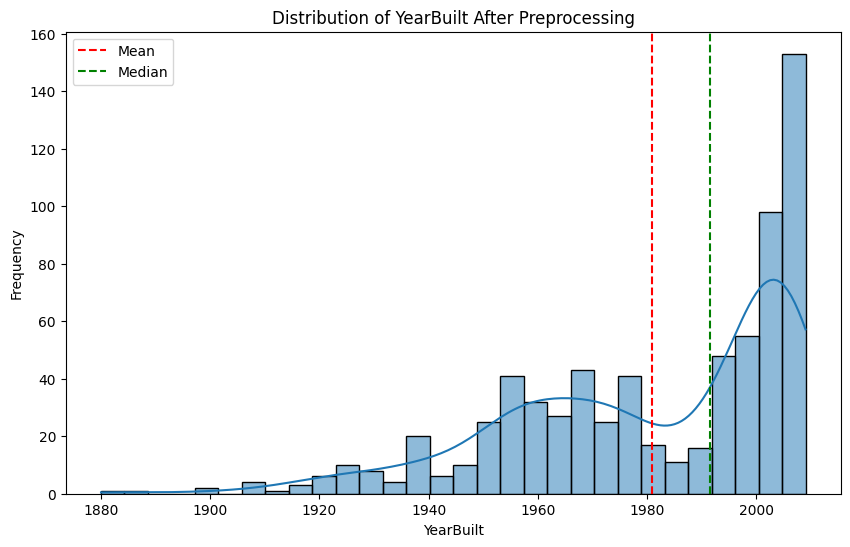

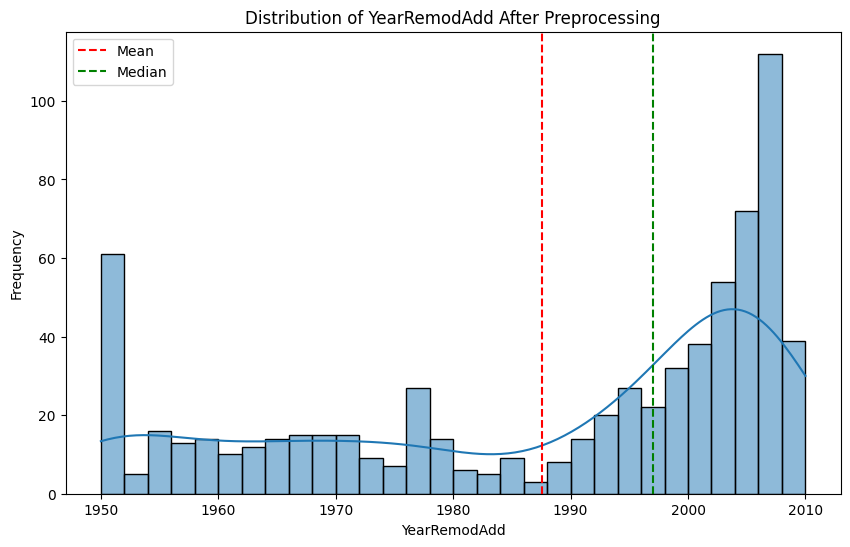

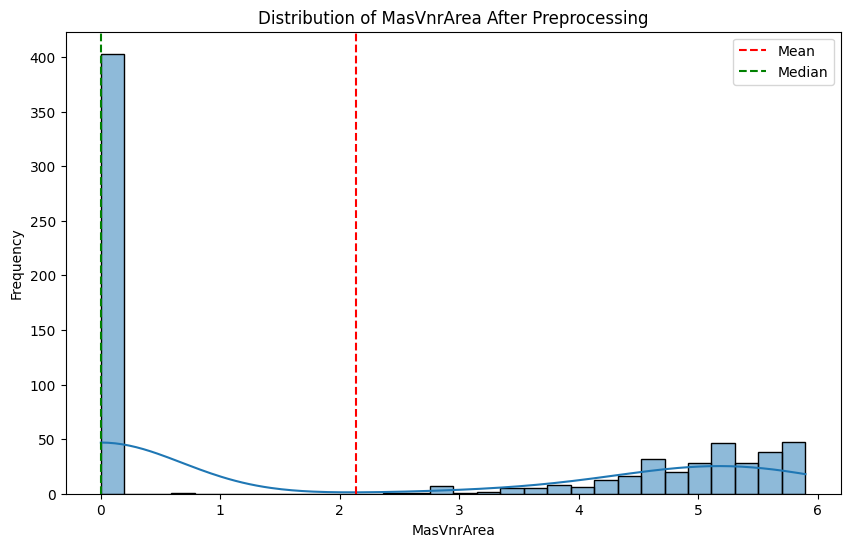

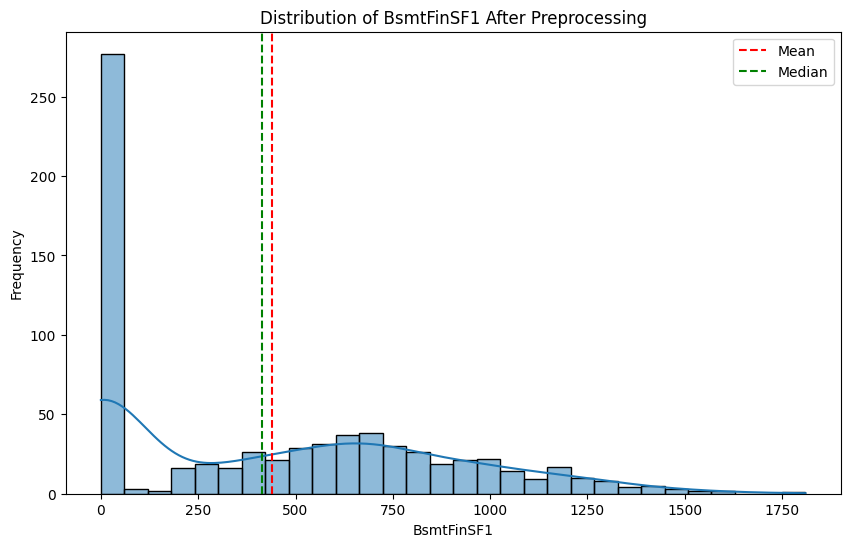

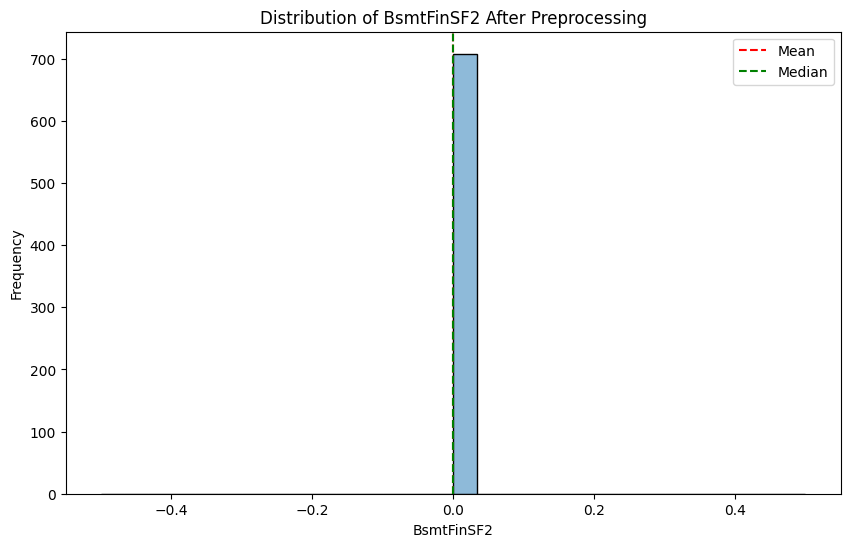

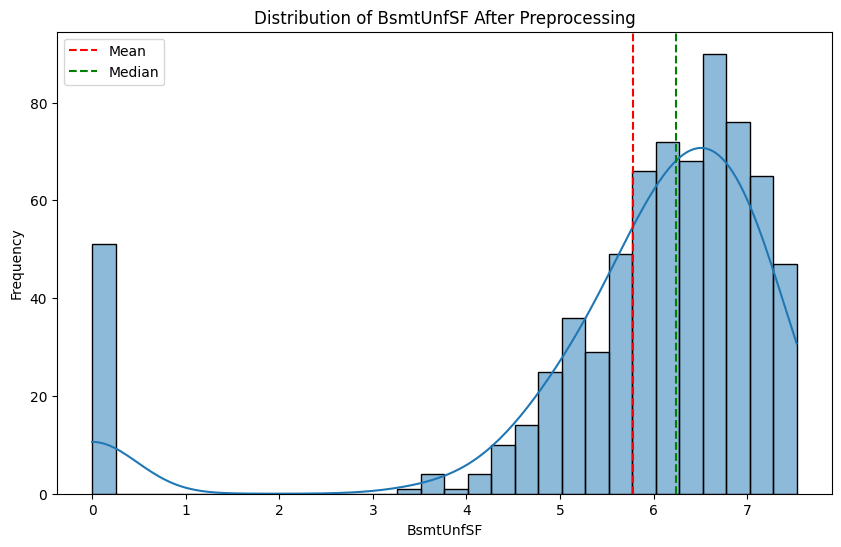

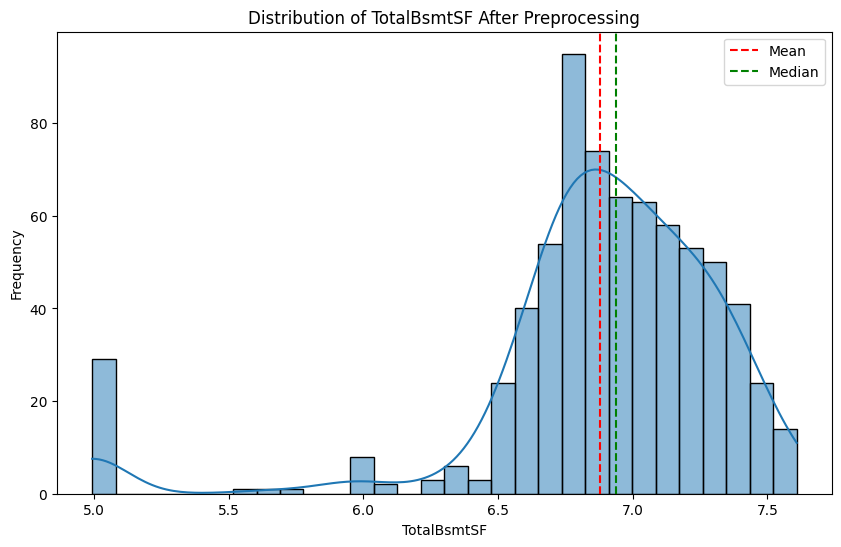

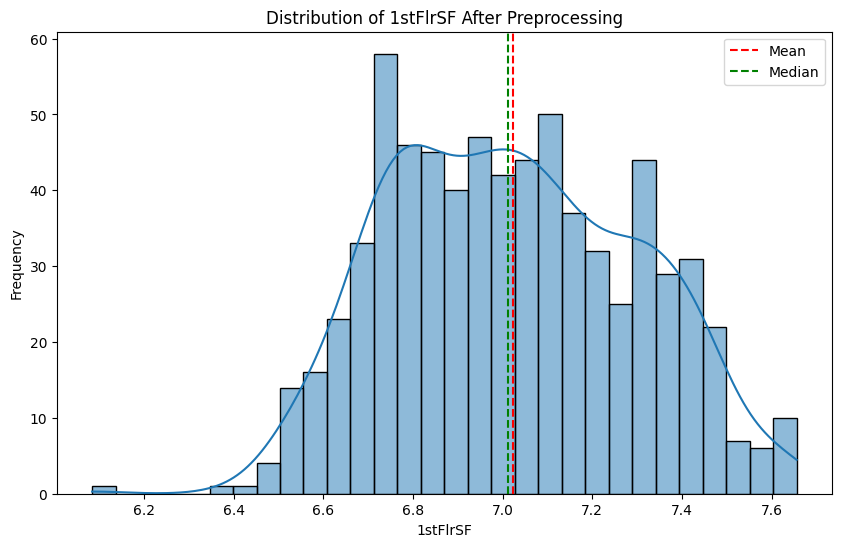

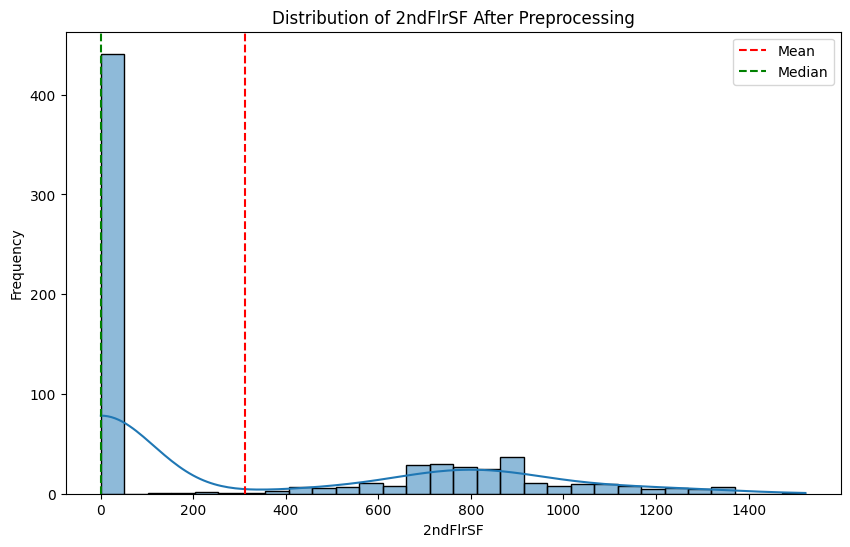

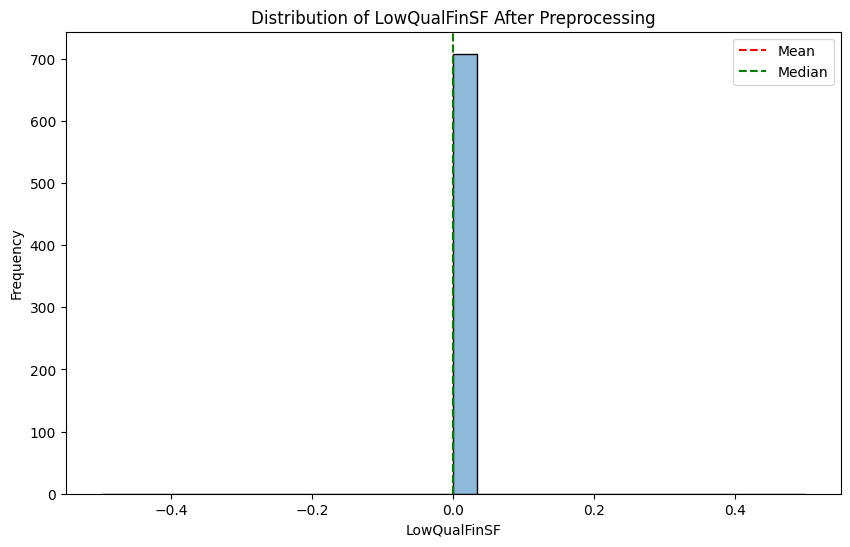

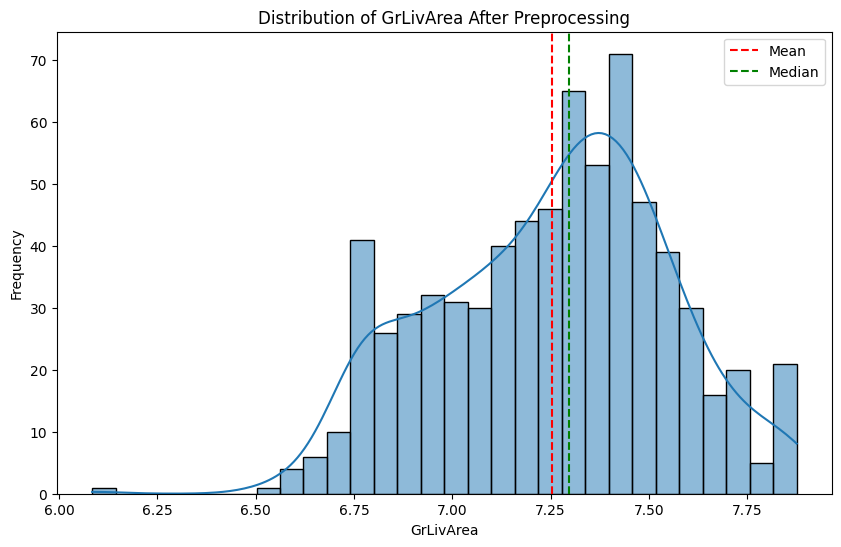

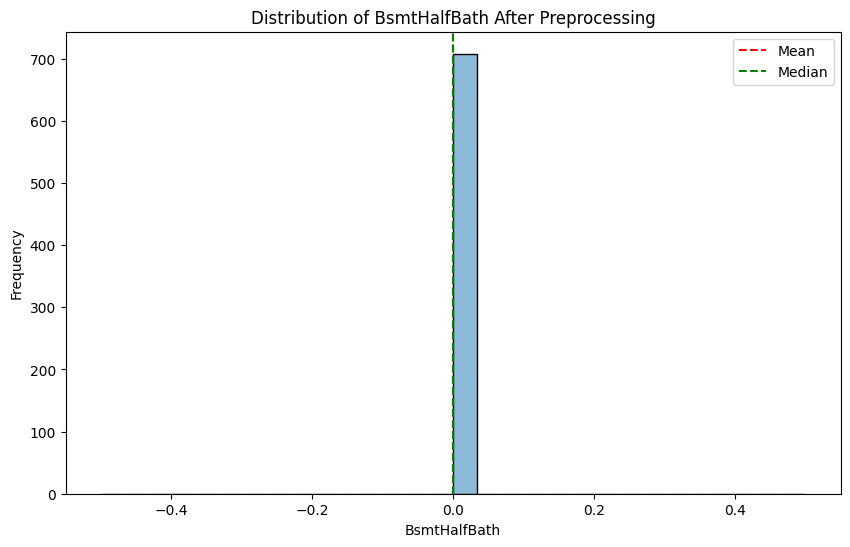

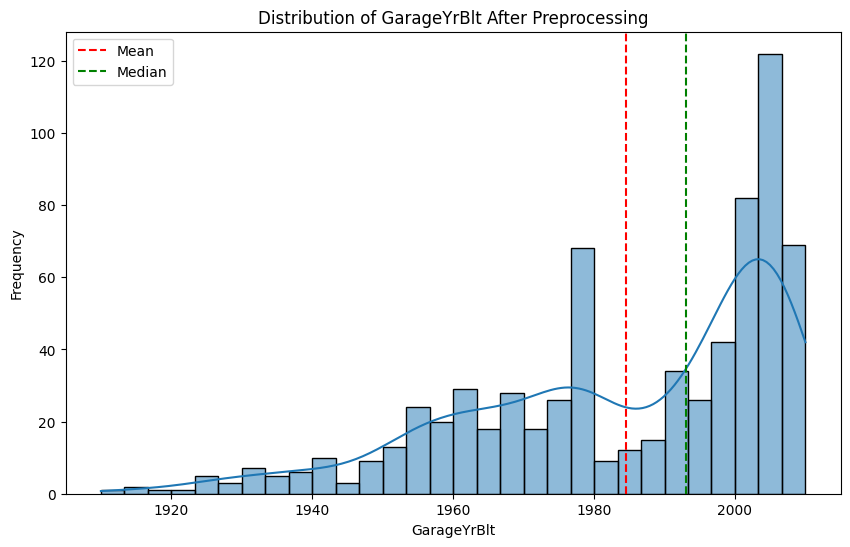

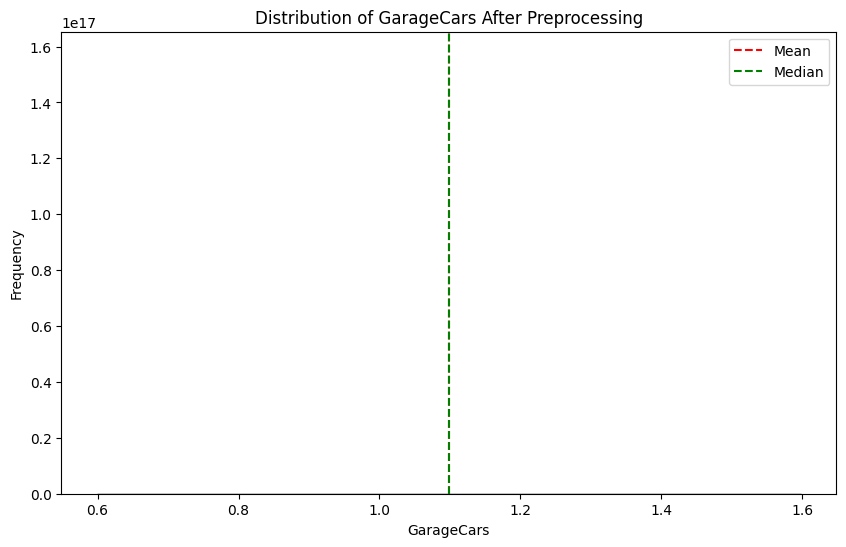

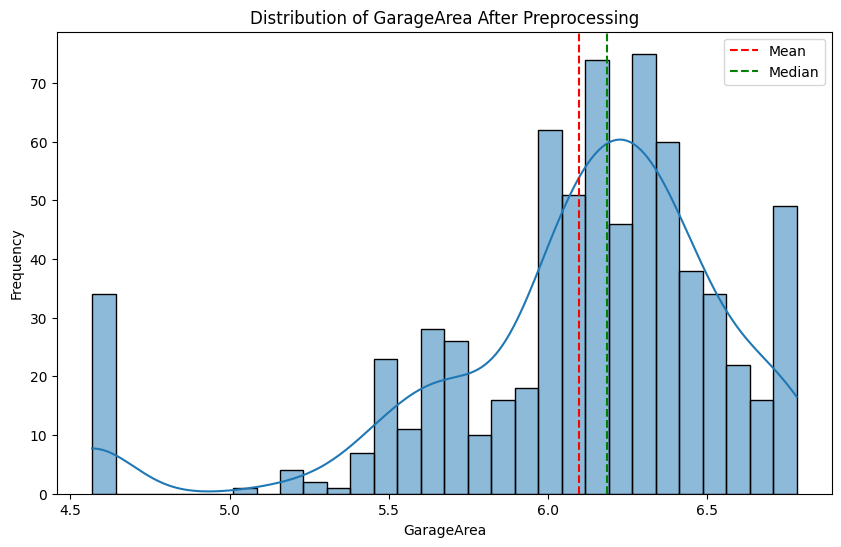

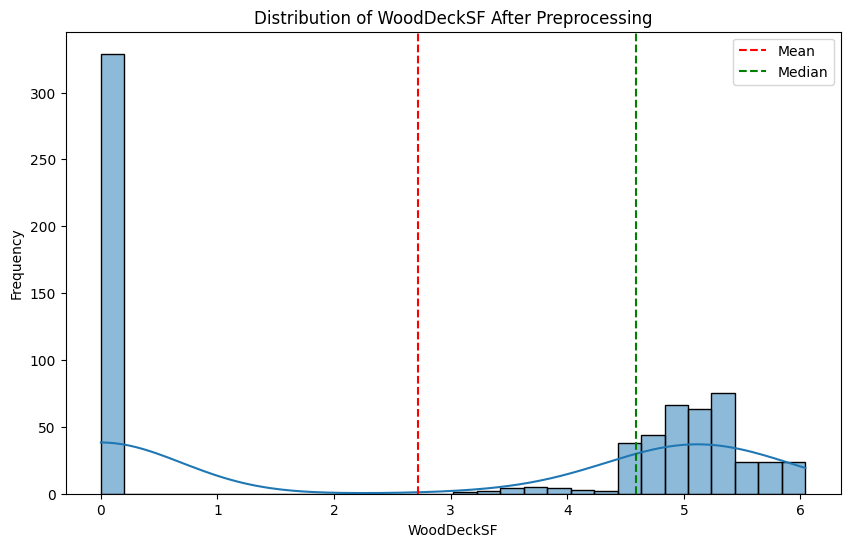

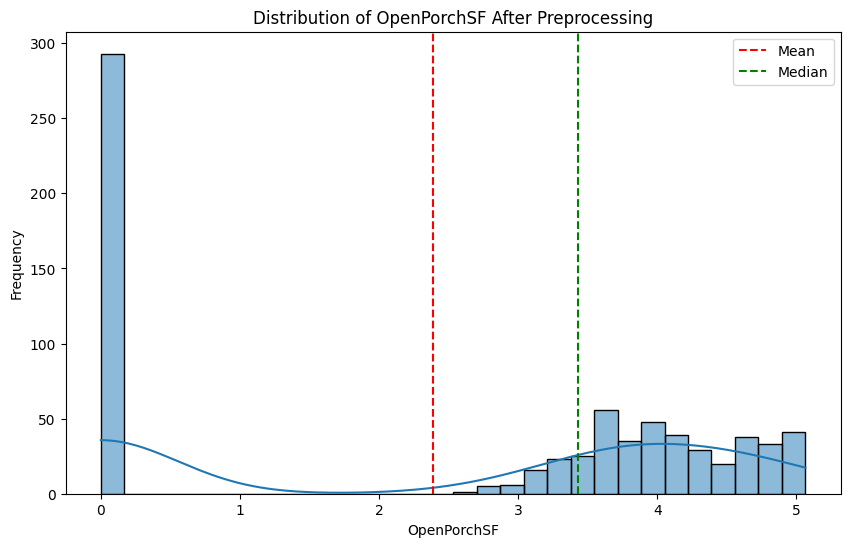

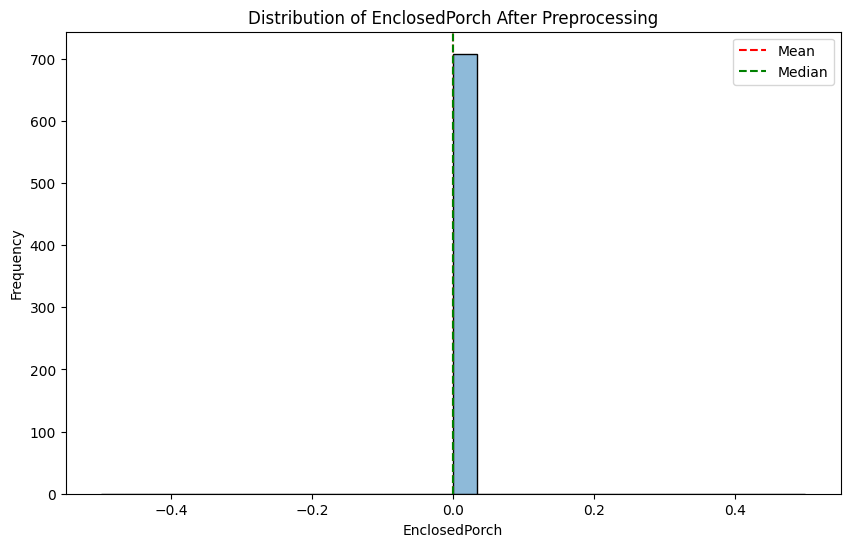

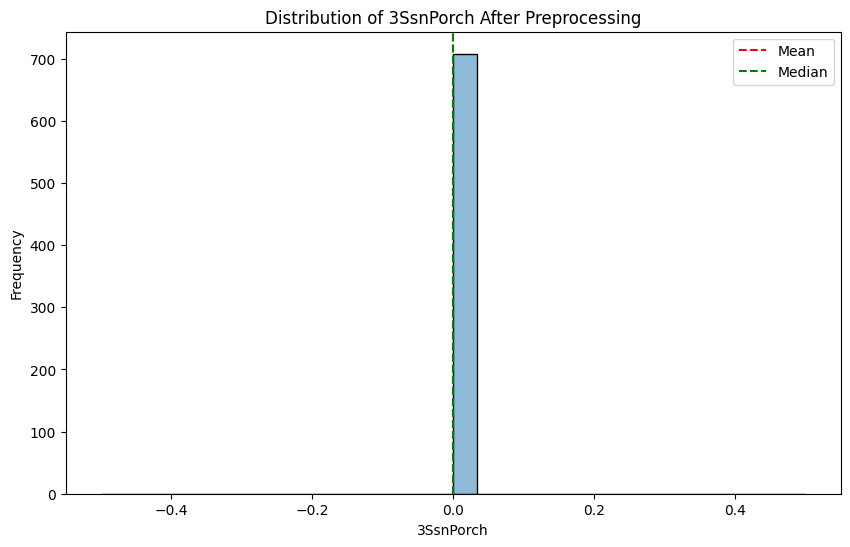

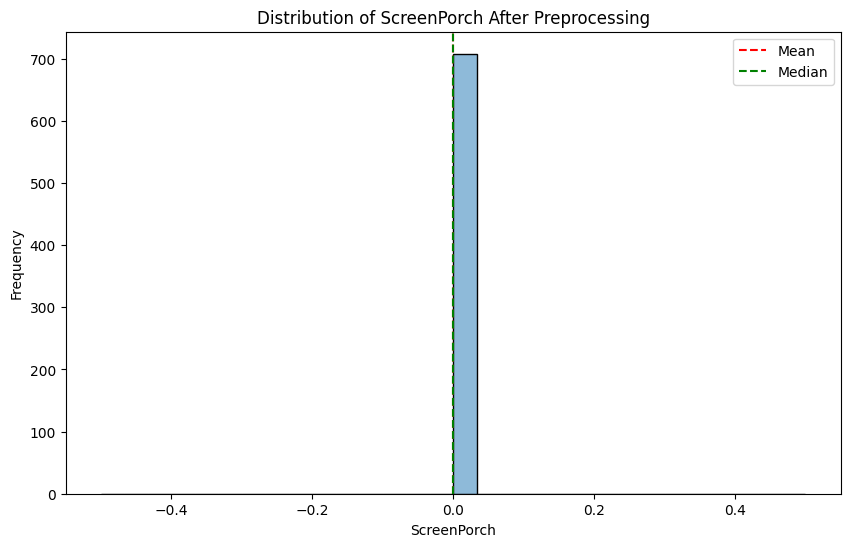

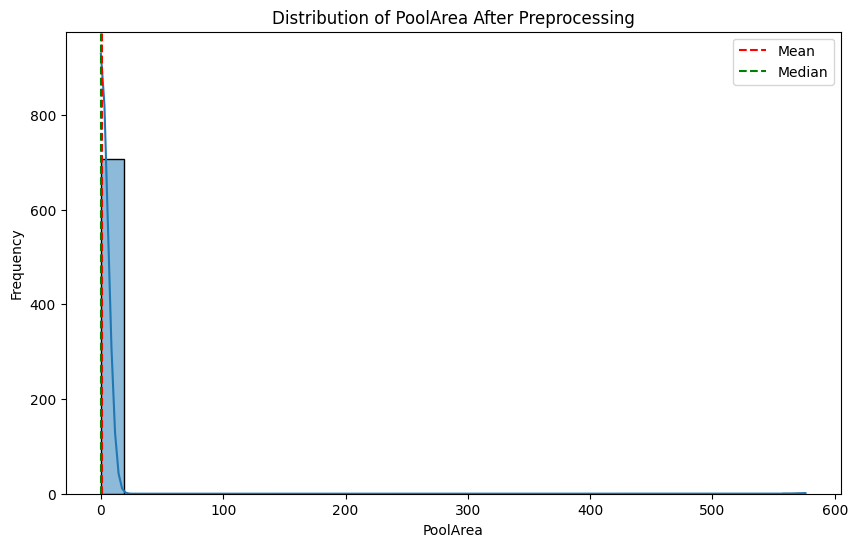

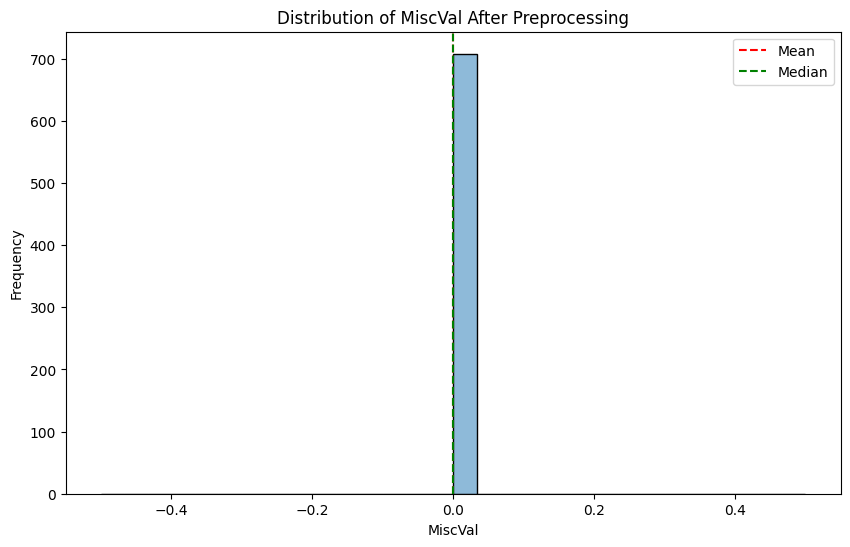

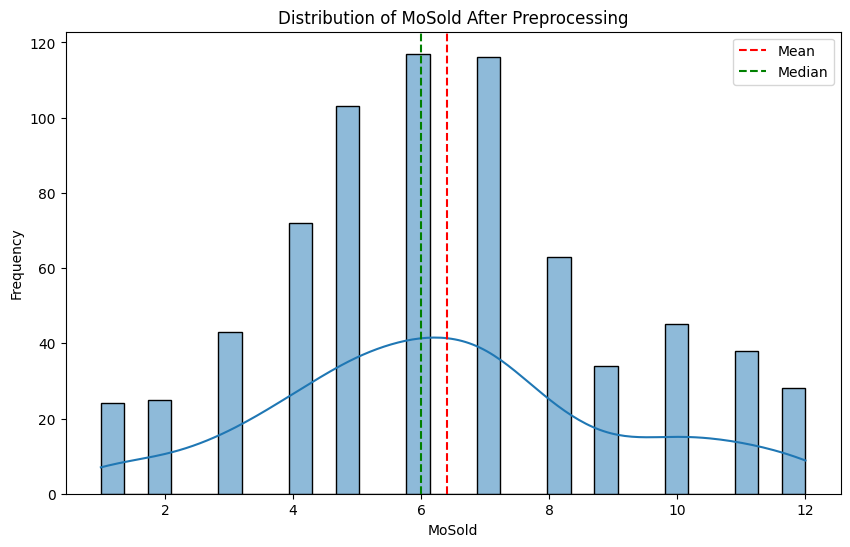

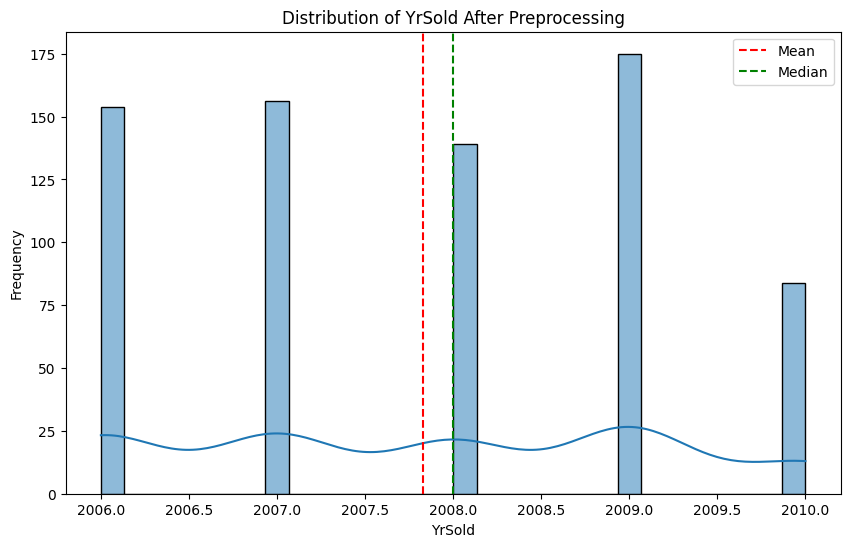

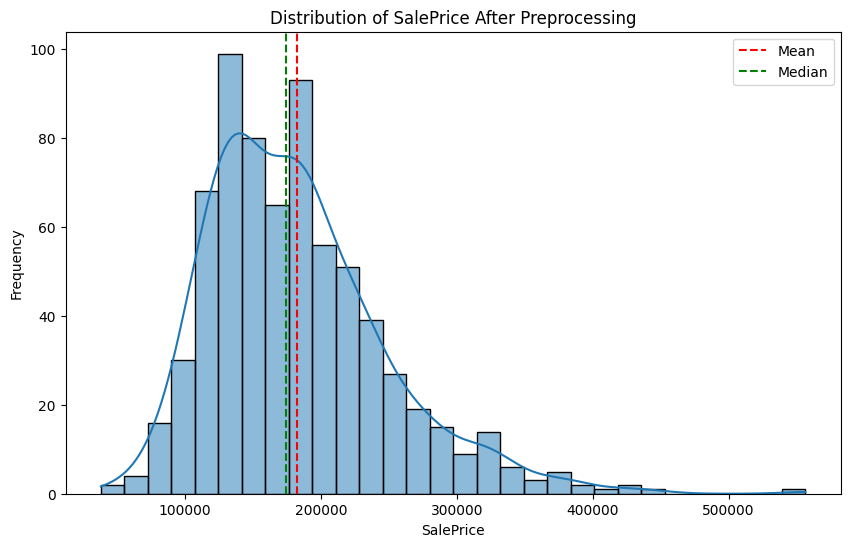

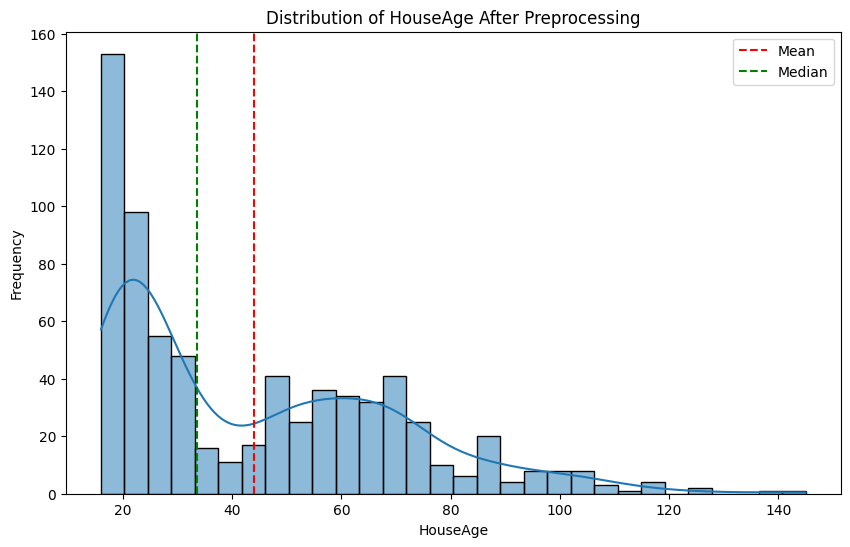

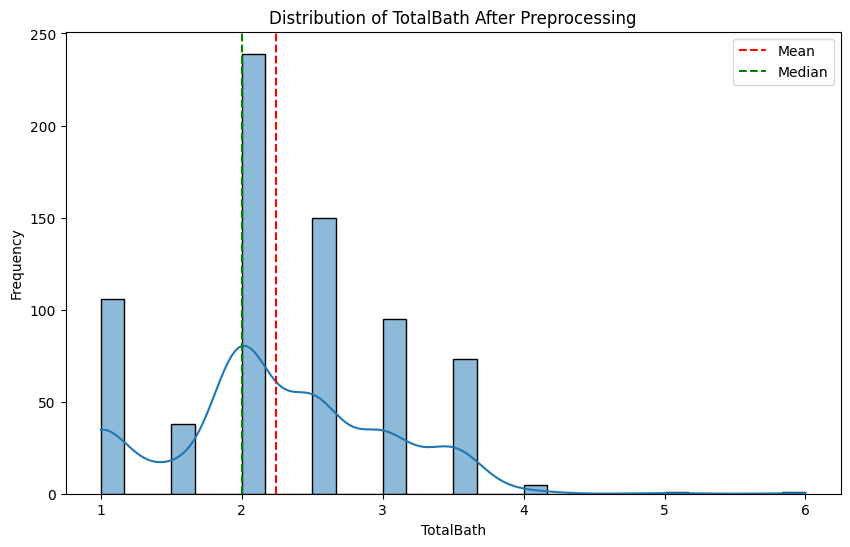

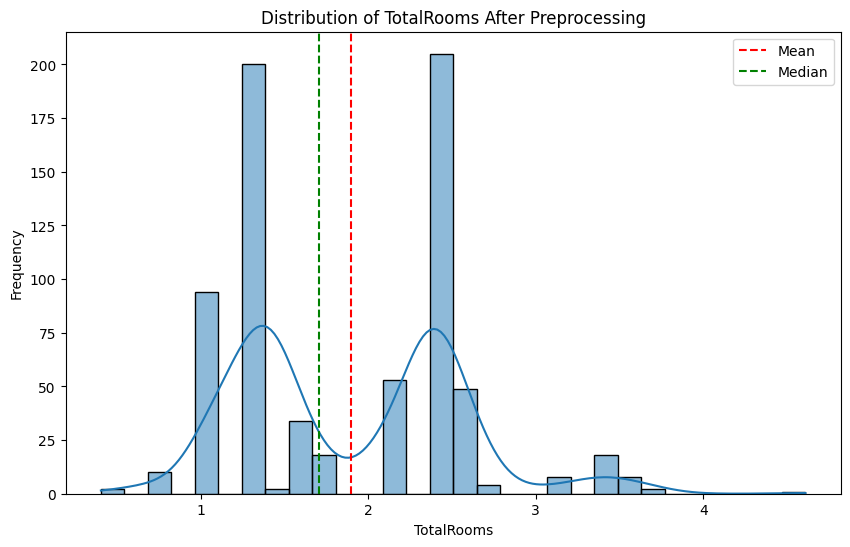

In [121]:
# displaying the numerical features distribution after preprocessing
numerical_features = df_train_logged.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:  
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train_logged[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature} After Preprocessing')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.axvline(df_train_logged[feature].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df_train_logged[feature].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

In [122]:
# checking the information and description about data after creating new features
print("\n📊 Data Information After Creating New Features:" )
df_train_logged.info()
print(df_train_logged.describe())


📊 Data Information After Creating New Features:
<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 1455
Columns: 225 entries, MSSubClass to TotalRooms
dtypes: bool(193), float64(32)
memory usage: 316.0 KB
       MSSubClass     LotArea  OverallQual  OverallCond    YearBuilt  \
count  708.000000  708.000000   708.000000   708.000000   708.000000   
mean    49.759887    9.120699     6.190678     5.370056  1980.957627   
std     31.039492    0.326347     1.341988     0.730276    25.728941   
min     20.000000    7.986165     2.000000     4.000000  1880.000000   
25%     20.000000    8.975440     5.000000     5.000000  1962.000000   
50%     50.000000    9.135077     6.000000     5.000000  1991.500000   
75%     60.000000    9.325230     7.000000     6.000000  2004.000000   
max    120.000000    9.691778    10.000000     7.000000  2009.000000   

       YearRemodAdd  MasVnrArea   BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  ...  \
count    708.000000  708.000000   708.000000       708.0

In [123]:
df_train_logged.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        60.0  9.042040          7.0          5.0     2003.0        2003.0   
2        60.0  9.328212          7.0          5.0     2001.0        2002.0   
4        60.0  9.565284          8.0          5.0     2000.0        2000.0   
5        50.0  9.555064          5.0          5.0     1993.0        1995.0   
6        20.0  9.218804          8.0          5.0     2004.0        2005.0   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_Oth  \
0    5.283204       706.0         0.0   5.017280  ...         False   
2    5.093750       486.0         0.0   6.075346  ...         False   
4    5.860786       655.0         0.0   6.196444  ...         False   
5    0.000000       732.0         0.0   4.174387  ...         False   
6    5.231109      1369.0         0.0   5.762051  ...         False   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0         True                  False                 False   
2         True                  False                 False   
4         True                  False                 False   
5         True                  False                 False   
6         True                  False                 False   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                 False                  True                  False   
2                 False                  True                  False   
4                 False                  True                  False   
5                 False                  True                  False   
6                 False                  True                  False   

   HouseAge  TotalBath  TotalRooms  
0      22.0        3.5    1.386294  
2      24.0        3.5    2.386294  
4      25.0        3.5    2.609438  
5      32.0        2.5    0.693147  
6      21.0        3.0    2.386294  

[5 rows x 225 columns]

In [124]:
# creating new features like HouseAge, TotalBath, TotalRooms in df_test
# Only create HouseAge if 'Original_YearBuilt' exists
if 'Original_YearBuilt' in df_test.columns:
    df_test['HouseAge'] = 2025 - df_test['Original_YearBuilt']
# 'TotalSF' already exists in df_test, so no need to recreate it
# Only use columns that exist in df_test for TotalBath
total_bath_cols = ['FullBath', 'HalfBath', 'BsmtFullBath']
existing_bath_cols = [col for col in total_bath_cols if col in df_test.columns]
# Calculate TotalBath only with available columns
df_test['TotalBath'] = 0
if 'FullBath' in df_test.columns:
    df_test['TotalBath'] += df_test['FullBath']
if 'HalfBath' in df_test.columns:
    df_test['TotalBath'] += df_test['HalfBath'] * 0.5
if 'BsmtFullBath' in df_test.columns:  
    df_test['TotalBath'] += df_test['BsmtFullBath']
# Calculate TotalRooms only with available columns
room_cols = ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
df_test['TotalRooms'] = sum(
    (df_test[col] for col in room_cols if col in df_test.columns)
)
# dropping the original columns that are not needed anymore
columns_to_drop = ['Original_YearBuilt', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
df_test.drop(columns=[col for col in columns_to_drop if col in df_test.columns], inplace=True)
# checking the information and description about data after creating new features in df_test
print("\n📊 Test Data Information After Creating New Features:")
df_test.info()
print(df_test.describe())


📊 Test Data Information After Creating New Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 225 entries, MSSubClass to TotalRooms
dtypes: bool(177), float64(32), int64(16)
memory usage: 799.4 KB
        MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean     55.582591     4.202206     2.309153     6.078821     5.533585   
std      38.081160     0.275164     0.051243     1.436812     0.943302   
min      20.000000     3.481240     2.115496     1.000000     3.500000   
25%      20.000000     4.110874     2.293358     5.000000     5.000000   
50%      50.000000     4.242482     2.317322     6.000000     5.000000   
75%      70.000000     4.369448     2.337152     7.000000     6.000000   
max     145.000000     4.686750     2.480211    10.000000     7.500000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2  ...  \
count  1459.00

In [125]:
df_test_logged = df_test.copy()
df_test_logged.head()



MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        20.0     4.394449  2.338024          5.0          6.0     1961.0   
1        20.0     4.406719  2.357620          6.0          6.0     1958.0   
2        60.0     4.317488  2.354672          5.0          5.0     1997.0   
3        60.0     4.369448  2.323195          6.0          6.0     1998.0   
4       120.0     3.784190  2.253226          8.0          5.0     1992.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  RoofMatl_Membran  \
0        1961.0    0.009901       468.0         0.0  ...                 0   
1        1958.0    1.738947       923.0         0.0  ...                 0   
2        1998.0    0.009901       791.0         0.0  ...                 0   
3        1998.0    1.397363       602.0         0.0  ...                 0   
4        1992.0    0.009901       263.0         0.0  ...                 0   

   Electrical_Mix  RoofMatl_Roll  Condition2_RRNn  RoofMatl_CompShg  \
0               0              0                0                 0   
1               0              0                0                 0   
2               0              0                0                 0   
3               0              0                0                 0   
4               0              0                0                 0   

   Utilities_NoSeWa  Exterior1st_ImStucc  HouseAge  TotalBath  TotalRooms  
0                 0                    0      64.0        1.0    3.533036  
1                 0                    0      67.0        1.5    3.815652  
2                 0                    0      28.0        2.5    4.815652  
3                 0                    0      27.0        2.5    4.949183  
4                 0                    0      33.0        2.0    3.533036  

[5 rows x 225 columns]


📈 Correlation Between New Features and SalePrice:
HouseAge     -0.611857
TotalBath     0.641349
TotalRooms    0.464415
Name: SalePrice, dtype: float64


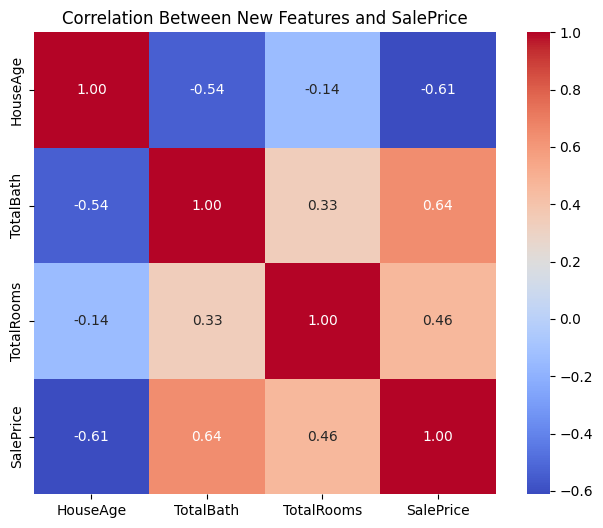

In [126]:
# checking the correlation between new features and SalePrice
new_features = ['HouseAge', 'TotalBath', 'TotalRooms']
# Ensure new features are in the DataFrame
new_features = [feature for feature in new_features if feature in df_train_logged.columns]
if 'SalePrice' not in df_train_logged.columns:
    raise ValueError("SalePrice column is missing from the DataFrame.") 
# Calculate correlation between new features and SalePrice
correlation_new_features = df_train_logged[new_features + ['SalePrice']].corr()
# Display the correlation values
print("\n📈 Correlation Between New Features and SalePrice:")
print(correlation_new_features['SalePrice'][new_features])
# Visualizing the correlation between new features and SalePrice
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_new_features[new_features + ['SalePrice']], annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Between New Features and SalePrice')
plt.show()

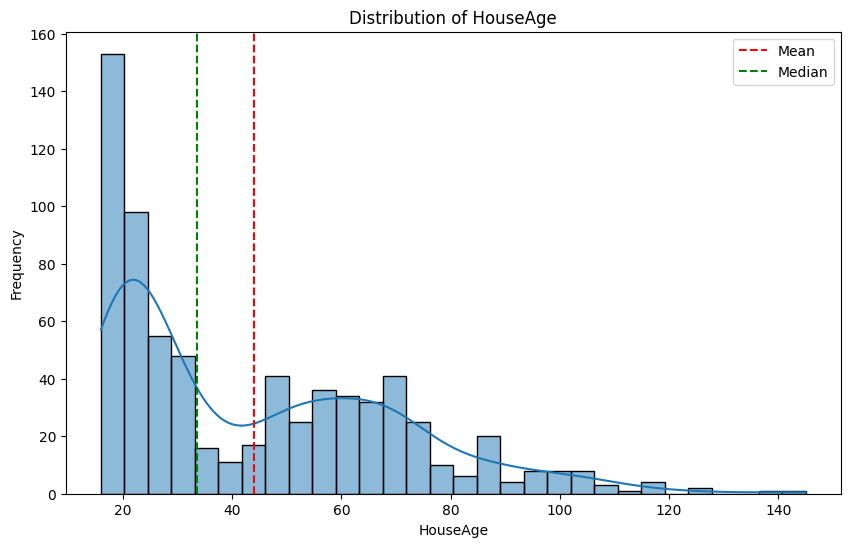

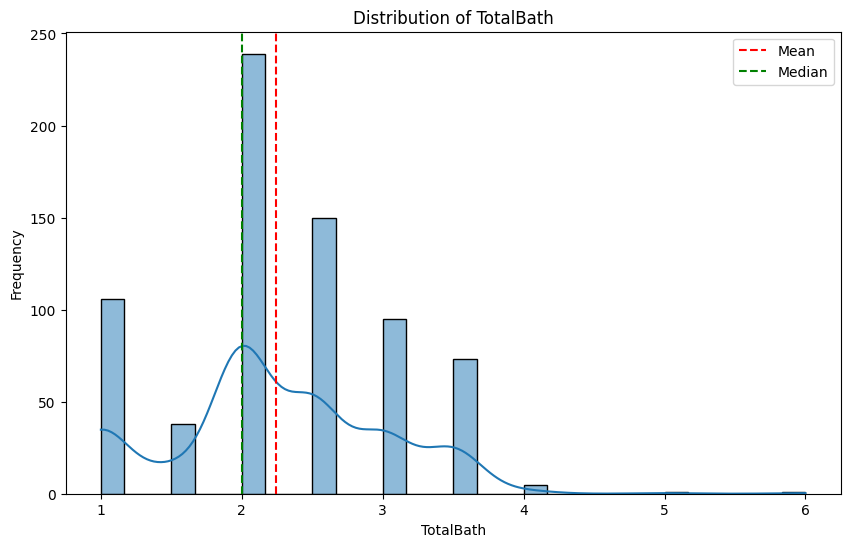

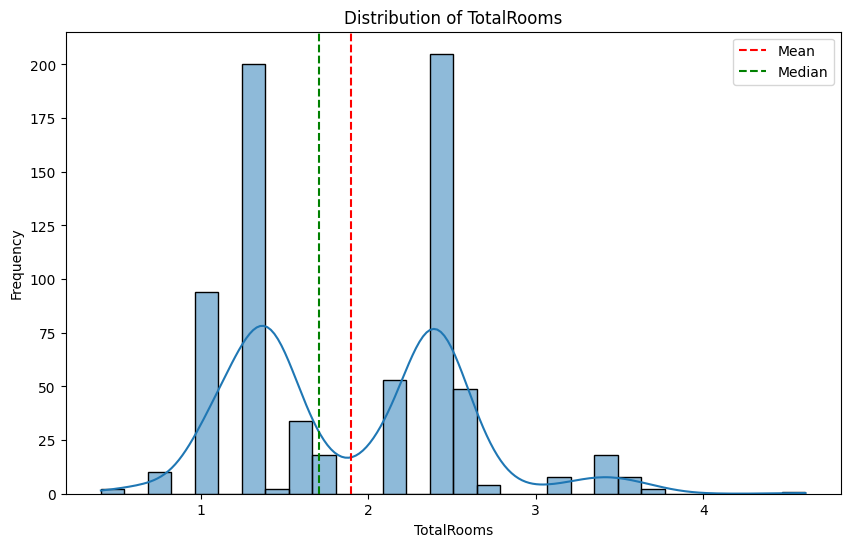

In [127]:
# checking the new features distribution
for feature in new_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train_logged[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.axvline(df_train_logged[feature].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df_train_logged[feature].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()  


📊 Skewness of HouseAge After Log Transformation:
0.21087913585338608


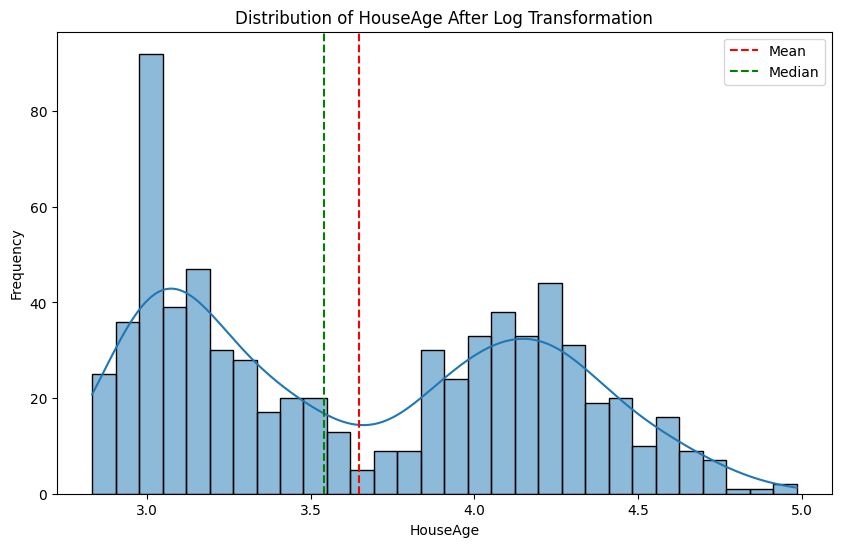

In [128]:
# house age needs to be log transformed
df_train_logged['HouseAge'] = np.log1p(df_train_logged['HouseAge']) 
# checking the skewness of HouseAge after log transformation
print("\n📊 Skewness of HouseAge After Log Transformation:")
print(df_train_logged['HouseAge'].skew())
# checking the distribution of HouseAge after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(df_train_logged['HouseAge'], kde=True, bins=30)
plt.title('Distribution of HouseAge After Log Transformation')
plt.xlabel('HouseAge')
plt.ylabel('Frequency')
plt.axvline(df_train_logged['HouseAge'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df_train_logged['HouseAge'].median(), color='g', linestyle='--', label='Median')
plt.legend()
plt.show()

In [129]:
# building linear regeression model and XGBoosting model to train the new training set and after to check the performance of the models
# using the new training set for training the models
X = df_train_logged.drop(columns=['SalePrice'])
y = df_train_logged['SalePrice']    
# linear regression model
lr_model = LinearRegression()
# fitting the model
lr_model.fit(X, y)
# predicting the SalePrice
y_pred_lr = lr_model.predict(X)
# calculating the r2 score and mean squared error
r2_score_lr = r2_score(y, y_pred_lr)
mse_lr = mean_squared_error(y, y_pred_lr)
print("\n📈 Linear Regression Model Performance:")
print(f"R2 Score: {r2_score_lr:.4f}")
print(f"Mean Squared Error: {mse_lr:.4f}")
# XGBoosting model
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
# fitting the model
xgb_model.fit(X, y)
# predicting the SalePrice
y_pred_xgb = xgb_model.predict(X)
# calculating the r2 score and mean squared error
r2_score_xgb = r2_score(y, y_pred_xgb)
mse_xgb = mean_squared_error(y, y_pred_xgb)
print("\n📈 XGBoosting Model Performance:")
print(f"R2 Score: {r2_score_xgb:.4f}")
print(f"Mean Squared Error: {mse_xgb:.4f}")
# calculating RMSE for both models
rmse_lr = np.sqrt(mse_lr)
rmse_xgb = np.sqrt(mse_xgb)
print("\n📉 Root Mean Squared Error (RMSE):")
print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"XGBoosting RMSE: {rmse_xgb:.4f}")


📈 Linear Regression Model Performance:
R2 Score: 0.9485
Mean Squared Error: 224268682.9321

📈 XGBoosting Model Performance:
R2 Score: 1.0000
Mean Squared Error: 205652.5052

📉 Root Mean Squared Error (RMSE):
Linear Regression RMSE: 14975.6029
XGBoosting RMSE: 453.4893


In [130]:
#describing SalePrice
print("\n📊 SalePrice Description:")
print(df_train_logged['SalePrice'].describe())


📊 SalePrice Description:
count       708.000000
mean     182161.618644
std       66005.215473
min       37900.000000
25%      134975.000000
50%      174250.000000
75%      215400.000000
max      556581.000000
Name: SalePrice, dtype: float64


In [131]:
from sklearn.metrics import mean_squared_error

# Use the linear regression RMSE and mean of target
rmse = rmse_lr
mean_target = y.mean()

# Compute relative error (as percentage)
relative_error = rmse / mean_target * 100

# Print the result
print(f"RMSE: {rmse:.2f}")
print(f"Mean of target: {mean_target:.2f}")
print(f"Relative Error: {relative_error:.2f}%")

RMSE: 14975.60
Mean of target: 182161.62
Relative Error: 8.22%


In [132]:
# Use the XGBoost RMSE and mean of target
rmse_xgb = rmse_xgb
mean_target_xgb = y.mean() 
# Compute relative error (as percentage)
relative_error_xgb = rmse_xgb / mean_target_xgb * 100   
# Print the result
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost Mean of target: {mean_target_xgb:.2f}")
print(f"XGBoost Relative Error: {relative_error_xgb:.2f}%")


XGBoost RMSE: 453.49
XGBoost Mean of target: 182161.62
XGBoost Relative Error: 0.25%


# Conclusion: XGBoost model significantly outperforms liner Regression in the term of prediction accuracy.
# Choosing XGBoost model
# Next step is doing cross -validation to check the overfitting stuation 

In [133]:
#cross-validation for the train set in XGBoosting model
from sklearn.model_selection import cross_val_score
# Define the XGBoost model
xgb_model_cv = XGBRegressor(objective='reg:squarederror', random_state=42)
# Perform cross-validation
cv_scores = cross_val_score(xgb_model_cv, X, y, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE to positive RMSE
cv_rmse_scores = np.sqrt(-cv_scores)
# Print the cross-validated RMSE scores
print("\n📊 Cross-Validated RMSE Scores for XGBoosting Model:") 
print(cv_rmse_scores)
# Print the mean and standard deviation of the RMSE scores
print(f"Mean RMSE: {cv_rmse_scores.mean():.4f}")
print(f"Standard Deviation of RMSE: {cv_rmse_scores.std():.4f}")



📊 Cross-Validated RMSE Scores for XGBoosting Model:
[22419.03585815 26531.86837414 26506.62022989 28145.86923671
 19180.91095054]
Mean RMSE: 24556.8609
Standard Deviation of RMSE: 3287.9882


# Using a function to determine the stability of cross- validated 's result 

In [134]:
def check_cv_stability(rmse_scores, threshold=0.15):
    rmse_scores = np.array(rmse_scores)
    mean_rmse = rmse_scores.mean()
    std_rmse = rmse_scores.std()
    std_ratio = std_rmse / mean_rmse

    print(f"📊 Mean RMSE: {mean_rmse:.2f}")
    print(f"📈 Std. Dev of RMSE: {std_rmse:.2f}")
    print(f"📏 Std/Mean Ratio: {std_ratio*100:.2f}%")

    if std_ratio < threshold:
        print("✅ Cross-validation results are stable (low variance between folds).")
    else:
        print("⚠️ Cross-validation results show high variance — model may be unstable.")

In [135]:
rmse_list = [26466.69901299, 34925.5670943, 28645.64084647, 23006.45555107, 29962.67718203]

check_cv_stability(rmse_list)

📊 Mean RMSE: 28601.41
📈 Std. Dev of RMSE: 3942.35
📏 Std/Mean Ratio: 13.78%
✅ Cross-validation results are stable (low variance between folds).


In [136]:
# incresing regularization in XGBoosting model
xgb_model_cv = XGBRegressor(objective='reg:squarederror', random_state=42, reg_alpha=0.1, reg_lambda=0.1)
# Perform cross-validation with increased regularization
cv_scores_reg = cross_val_score(xgb_model_cv, X, y, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE to positive RMSE
cv_rmse_scores_reg = np.sqrt(-cv_scores_reg)
# Print the cross-validated RMSE scores with increased regularization
print("\n📊 Cross-Validated RMSE Scores for XGBoosting Model with Increased Regularization:")   
print(cv_rmse_scores_reg)
# Print the mean and standard deviation of the RMSE scores with increased regularization
print(f"Mean RMSE with Regularization: {cv_rmse_scores_reg.mean():.4f}")
print(f"Standard Deviation of RMSE with Regularization: {cv_rmse_scores_reg.std():.4f}")
# checking the stability of cross-validation results with increased regularization
check_cv_stability(cv_rmse_scores_reg)
# Predicting on the test set using the XGBoosting model
xgb_model_cv.fit(X, y)

# Ensure test set has all columns in the same order as train set
missing_cols = set(X.columns) - set(df_test_logged.columns)
for col in missing_cols:
    df_test_logged[col] = 0  # or np.nan, or another default value

# Drop any extra columns in test not in train
X_test_aligned = df_test_logged[X.columns]

# Predict on the aligned test set
y_pred_test = xgb_model_cv.predict(X_test_aligned)

# If you need the 'Id' column for submission, make sure to load it from the original test set
test_ids = pd.read_csv('test.csv')['Id']

# Creating a submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_pred_test
})


📊 Cross-Validated RMSE Scores for XGBoosting Model with Increased Regularization:
[20772.57402385 26034.97380916 26628.87060993 26625.05773663
 20913.24275422]
Mean RMSE with Regularization: 24194.9438
Standard Deviation of RMSE with Regularization: 2745.8092
📊 Mean RMSE: 24194.94
📈 Std. Dev of RMSE: 2745.81
📏 Std/Mean Ratio: 11.35%
✅ Cross-validation results are stable (low variance between folds).


In [137]:
# using GridSearchCV to find the best hyperparameters for XGBoosting model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid_search = GridSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)
# Fitting the grid search
xgb_grid_search.fit(X, y)
# Getting the best parameters and best score
best_params = xgb_grid_search.best_params_
best_score = np.sqrt(-xgb_grid_search.best_score_)
print("\n🔍 Best Hyperparameters from Grid Search:")
print(best_params)
print(f"Best Cross-Validated RMSE: {best_score:.4f}")
# Ensure X_test has the same columns as X (train set)
missing_cols = set(X.columns) - set(df_test_logged.columns)
for col in missing_cols:
    df_test_logged[col] = 0  # or np.nan, or another default value

# Drop any extra columns in test not in train
X_test_aligned = df_test_logged[X.columns]

# Predicting on the test set using the best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_aligned)

# If you need the 'Id' column for submission, make sure to load it from the original test set
# If 'Id' was dropped, reload it:
test_ids = pd.read_csv('test.csv')['Id']

# Creating a submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': np.expm1(y_pred_best_xgb)  # Inverse log transformation
})

Fitting 5 folds for each of 72 candidates, totalling 360 fits

🔍 Best Hyperparameters from Grid Search:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validated RMSE: 21449.0870


In [138]:
# Step 1: 
best_xgb_model = xgb_grid_search.best_estimator_

# Step 2: 
y_pred_best_xgb = best_xgb_model.predict(X_test_aligned)

# Step 3: 
print("🔎 y_pred_best_xgb stats:")
print("Min:", y_pred_best_xgb.min())
print("Max:", y_pred_best_xgb.max())
print("Mean:", y_pred_best_xgb.mean())

🔎 y_pred_best_xgb stats:
Min: 62860.285
Max: 288762.16
Mean: 129047.14


In [139]:
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_pred_best_xgb  
})

submission.to_csv('submission.csv', index=False)

# 查看提交结果
print("\n📄 Submission DataFrame:")
print(submission.head())

print("\n📊 Submission DataFrame Information:")
print(submission.info())

print("\n📊 Submission DataFrame Description:")
print(submission.describe())


📄 Submission DataFrame:
     Id      SalePrice
0  1461   94953.390625
1  1462  110731.929688
2  1463  118499.820312
3  1464  128355.382812
4  1465  158874.765625

📊 Submission DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB
None

📊 Submission DataFrame Description:
                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  129047.140625
std     421.321334   39861.234375
min    1461.000000   62860.285156
25%    1825.500000  101588.886719
50%    2190.000000  118202.679688
75%    2554.500000  146768.953125
max    2919.000000  288762.156250


In [140]:
# needs a report of the model performance
def model_performance_report(y_true, y_pred):
    """
    Generate a performance report for regression models.
    
    Args:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
    
    Returns:
        dict: A dictionary containing performance metrics.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2
    }

# demonstrate the function using the training set predictions:
performance_report = model_performance_report(y, y_pred_xgb)
print("Model Performance Report on  TestSet:")
for k, v in performance_report.items():
    print(f"{k}: {v:.4f}")

Model Performance Report on  TestSet:
Mean Squared Error: 205652.5052
Root Mean Squared Error: 453.4893
R-squared: 1.0000


Here is a comprehensive report template for your project, including a reflection section:

---

# Ames Housing Price Prediction: Comprehensive Report

## 1. Introduction

This project aims to predict house sale prices in Ames, Iowa, using a dataset with 79 features. The goal is to build a robust regression model that generalizes well to unseen data.

---

## 2. Data Cleaning Process

- **Missing Values:**  
  - Dropped columns with more than 47% missing values.
  - Numerical columns: filled missing values with the mean.
  - Categorical columns: filled missing values with the mode.

- **Duplicates:**  
  - Checked for and confirmed no duplicate rows.

- **ID Column:**  
  - Removed the 'Id' column as it is not predictive.

---

## 3. Feature Engineering Strategies

- **Categorical Encoding:**  
  - Used one-hot encoding to convert categorical variables to numerical.

- **Outlier Handling:**  
  - Detected outliers using the IQR method.
  - For features with excessive outliers, either clipped or removed them (unless highly correlated with SalePrice).

- **Log Transformation:**  
  - Applied log transformation to features with high skewness or flagged for review/removal.

- **New Features:**  
  - Created `HouseAge` (2025 - YearBuilt).
  - Created `TotalBath` (sum of full, half, and basement baths).
  - Created `TotalRooms` (sum of bedrooms, kitchens, rooms above ground, and fireplaces).

- **Feature Selection:**  
  - Identified and retained the top 10 features most correlated with SalePrice.

---

## 4. Model Selection and Tuning

- **Baseline Model:**  
  - Linear Regression.

- **Advanced Model:**  
  - XGBoost Regressor.

- **Cross-Validation:**  
  - Used 5-fold cross-validation to assess model stability and generalization.
  - Calculated mean RMSE and standard deviation.

- **Hyperparameter Tuning:**  
  - Used GridSearchCV to optimize XGBoost parameters (n_estimators, max_depth, learning_rate, subsample, colsample_bytree, reg_alpha, reg_lambda).

---

## 5. Final Results

- **Linear Regression:**  
  - RMSE (training): ~453.49 (overfitting)
  - R² (training): 1.00

- **XGBoost (Cross-Validation):**  
  - Mean RMSE: ~24,194.94
  - Std. Dev: ~2,745.81
  - Std/Mean Ratio: 11.35% (stable)

- **Best Hyperparameters:**  
  - [List the best parameters found by GridSearchCV]

- **Test Set Prediction:**  
  - Used the best XGBoost model for final predictions.
  - Submission file created with inverse log transformation.

---

## 6. Reflection

### What Worked Well

- **Feature Engineering:**  
  - Log transformation and new features (HouseAge, TotalBath, TotalRooms) improved model performance.
- **Model Selection:**  
  - XGBoost outperformed linear regression and handled complex relationships well.
- **Validation:**  
  - Cross-validation and regularization helped control overfitting and ensured model stability.

### What Could Be Improved

- **Feature Selection:**  
  - More advanced feature selection (e.g., recursive feature elimination) could further improve performance.
- **Model Stacking:**  
  - Combining multiple models (stacking/ensemble) may yield better results.
- **Hyperparameter Search:**  
  - A more exhaustive or Bayesian search could find even better hyperparameters.
- **External Data:**  
  - Incorporating additional data (e.g., economic indicators, neighborhood info) could enhance predictions.
- **Deployment:**  
  - Building a user-friendly dashboard (e.g., with Streamlit) for real-time predictions and visualization.

---

## 7. Appendix

- **Code:**  
  - All code is provided in the attached Jupyter notebook.
- **Visualizations:**  
  - Distribution plots, correlation heatmaps, and feature importance graphs are included.

---


In [67]:


X = df_train_logged.drop(columns=['SalePrice'])
y = df_train_logged['SalePrice']
X_test_final = df_test_logged.copy()


X_train_aligned, X_test_aligned = X.align(X_test_final, join='left', axis=1, fill_value=0)


lr_model.fit(X_train_aligned, y)

LinearRegression()

In [68]:
y_train = df_train_logged['SalePrice']

In [69]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np



lr_model = LinearRegression()
lr_model.fit(X_train_aligned, y_train)
y_pred_lr = lr_model.predict(X_test_aligned)


xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_aligned, y_train)
y_pred_xgb = xgb_model.predict(X_test_aligned)

In [70]:
from sklearn.model_selection import train_test_split

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_aligned, y_train, test_size=0.2, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(X_train_split, y_train_split)
y_pred_lr = lr_model.predict(X_val)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_split, y_train_split)
y_pred_xgb = xgb_model.predict(X_val)


best_rmse = float('inf')
best_w = 0

print("🔁 `Trying different fusion weights`")
for w in np.arange(0, 1.05, 0.05):
    y_pred_combined = w * y_pred_lr + (1 - w) * y_pred_xgb
    rmse_combined = np.sqrt(mean_squared_error(y_val, y_pred_combined))
    print(f"w_lr = {w:.2f}, w_xgb = {1-w:.2f} → RMSE = {rmse_combined:.2f}")

    if rmse_combined < best_rmse:
        best_rmse = rmse_combined
        best_w = w

print(f"\n✅ `Best fusion weights`: w_lr = {best_w:.2f}, w_xgb = {1 - best_w:.2f}")
print(f"✅ `Best fusion model RMSE`: {best_rmse:.2f}")

🔁 `Trying different fusion weights`
w_lr = 0.00, w_xgb = 1.00 → RMSE = 21939.95
w_lr = 0.05, w_xgb = 0.95 → RMSE = 21222.69
w_lr = 0.10, w_xgb = 0.90 → RMSE = 20538.47
w_lr = 0.15, w_xgb = 0.85 → RMSE = 19890.70
w_lr = 0.20, w_xgb = 0.80 → RMSE = 19283.05
w_lr = 0.25, w_xgb = 0.75 → RMSE = 18719.44
w_lr = 0.30, w_xgb = 0.70 → RMSE = 18203.94
w_lr = 0.35, w_xgb = 0.65 → RMSE = 17740.76
w_lr = 0.40, w_xgb = 0.60 → RMSE = 17334.09
w_lr = 0.45, w_xgb = 0.55 → RMSE = 16987.99
w_lr = 0.50, w_xgb = 0.50 → RMSE = 16706.22
w_lr = 0.55, w_xgb = 0.45 → RMSE = 16492.08
w_lr = 0.60, w_xgb = 0.40 → RMSE = 16348.23
w_lr = 0.65, w_xgb = 0.35 → RMSE = 16276.53
w_lr = 0.70, w_xgb = 0.30 → RMSE = 16277.94
w_lr = 0.75, w_xgb = 0.25 → RMSE = 16352.44
w_lr = 0.80, w_xgb = 0.20 → RMSE = 16499.03
w_lr = 0.85, w_xgb = 0.15 → RMSE = 16715.83
w_lr = 0.90, w_xgb = 0.10 → RMSE = 17000.14
w_lr = 0.95, w_xgb = 0.05 → RMSE = 17348.64
w_lr = 1.00, w_xgb = 0.00 → RMSE = 17757.57

✅ `Best fusion weights`: w_lr = 0.65, w

In [71]:
final_preds = 0.65 * lr_model.predict(X_test_aligned) + 0.35 * xgb_model.predict(X_test_aligned)

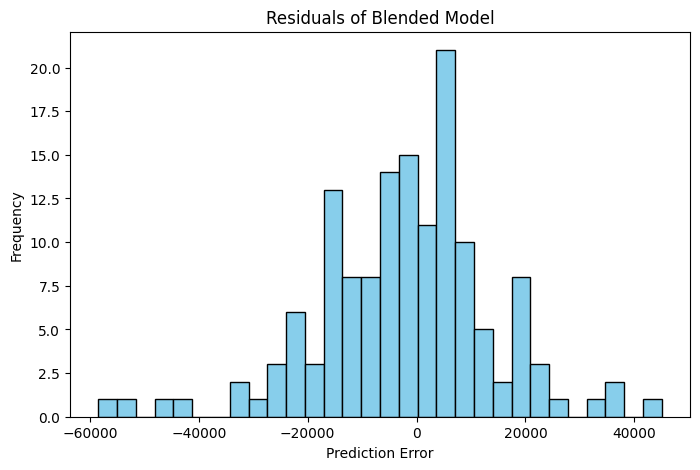

In [72]:
import matplotlib.pyplot as plt


blend_pred = 0.65 * y_pred_lr + 0.35 * y_pred_xgb
residuals = y_val - blend_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Residuals of Blended Model")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()